# Anamoly Detection-Fraud Detection

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest # Random forest classifier

from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score
import itertools

from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import average_precision_score
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [56]:
#Read the credit card data
#credit = pd.read_csv('D:\Projects\Kaggle\Fraud Detection\MS-Train Features.csv')
credit = pd.read_csv('D:\Projects\Kaggle\Fraud Detection\MS-Data.csv')

In [57]:
#testcredit = pd.read_csv('D:\Projects\Kaggle\Fraud Detection\MS-Test Features.csv')
#testcredit.shape, 
credit.shape

(197648, 53)

In [47]:
#set(testcredit.columns)-set(credit.columns)

# 1) Simple EDA

In [58]:
credit.head()

,Label,transactionCurrencyCode - Class000_LogOdds,localHour - Class000_LogOdds,ipState - Class000_LogOdds,ipPostalCode - Class000_LogOdds,ipCountry - Class000_LogOdds,browserLanguage - Class000_LogOdds,paymentBillingPostalCode - Class000_LogOdds,paymentBillingState - Class000_LogOdds,paymentBillingCountryCode - Class000_LogOdds,...,cardType,cardNumberInputMethod,cvvVerifyResult,responseCode,digitalItemCount,physicalItemCount,purchaseProductType,accountAge,isUserRegistered,paymentInstrumentAgeInAccount
0,0,4.833330,4.745402,1.218157,1.259543,4.899422,4.829913,5.064533,1.312186,4.876319,...,VISA,0,X,0,0,1,0,2000,False,3279.574306
1,0,5.166279,4.921349,4.035601,3.981118,5.132626,5.166234,0.538996,4.401370,5.141895,...,MC,0,M,0,1,2,0,62,False,61.970139
2,0,5.166279,4.742303,3.314186,5.008490,5.132626,5.166234,5.064533,3.056357,5.141895,...,MC,0,M,0,0,1,0,2000,False,0.000000
3,0,4.033379,4.745402,3.529398,1.324925,4.050173,3.938570,5.064533,3.331154,4.068874,...,VISA,0,M,0,1,0,0,1,False,0.000000
4,0,5.166279,4.876771,3.529398,2.693451,4.050173,5.166234,5.412885,5.563677,4.068874,...,0,0,0,0,1,0,0,1,False,0.001389


In [59]:
credit.columns

Index(['Label', 'transactionCurrencyCode - Class000_LogOdds',
       'localHour - Class000_LogOdds', 'ipState - Class000_LogOdds',
       'ipPostalCode - Class000_LogOdds', 'ipCountry - Class000_LogOdds',
       'browserLanguage - Class000_LogOdds',
       'paymentBillingPostalCode - Class000_LogOdds',
       'paymentBillingState - Class000_LogOdds',
       'paymentBillingCountryCode - Class000_LogOdds',
       'shippingPostalCode - Class000_LogOdds',
       'shippingState - Class000_LogOdds',
       'shippingCountry - Class000_LogOdds',
       'accountPostalCode - Class000_LogOdds',
       'accountState - Class000_LogOdds', 'accountCountry - Class000_LogOdds',
       'is_highAmount', 'acct_billing_address_mismatchFlag',
       'acct_billing_postalCode_mismatchFlag',
       'acct_billing_country_mismatchFlag', 'acct_billing_name_mismatchFlag',
       'acct_shipping_address_mismatchFlag',
       'acct_shipping_postalCode_mismatchFlag',
       'acct_shipping_country_mismatchFlag',
      

In [60]:
credit = credit.drop('accountID', axis=1)
#testcredit = testcredit.drop('accountID', axis=1)

In [61]:
credit.dtypes[credit.dtypes=='object']

transactionType          object
paymentInstrumentType    object
cardType                 object
cvvVerifyResult          object
dtype: object

In [62]:
#one-hot encoding catogory column
credit = pd.get_dummies(data=credit,columns=['transactionType'])
credit = pd.get_dummies(data=credit,columns=['paymentInstrumentType'])
credit = pd.get_dummies(data=credit,columns=['cardType'])
credit = pd.get_dummies(data=credit,columns=['cvvVerifyResult'])
#testcredit = pd.get_dummies(data=testcredit,columns=['transactionType'])
#testcredit = pd.get_dummies(data=testcredit,columns=['paymentInstrumentType'])
#testcredit = pd.get_dummies(data=testcredit,columns=['cardType'])
#testcredit = pd.get_dummies(data=testcredit,columns=['cvvVerifyResult'])
credit.shape
#, testcredit.shape

(197648, 67)

In [63]:
#set(credit.columns)-set(testcredit.columns)

In [64]:
#testcredit['paymentInstrumentType_DIRECTDEBIT']= 0
#credit.shape, testcredit.shape

#### There is no null values in the data and hence we dont need to spending time on data cleaning.

In [65]:
credit.isnull().sum()[credit.isnull().sum()>0]

Series([], dtype: int64)

In [66]:
#Describe gives statistical information about all columns in the dataset
credit_dec = pd.DataFrame(credit.describe())

In [67]:
credit_dec.head(8)

,Label,transactionCurrencyCode - Class000_LogOdds,localHour - Class000_LogOdds,ipState - Class000_LogOdds,ipPostalCode - Class000_LogOdds,ipCountry - Class000_LogOdds,browserLanguage - Class000_LogOdds,paymentBillingPostalCode - Class000_LogOdds,paymentBillingState - Class000_LogOdds,paymentBillingCountryCode - Class000_LogOdds,...,cardType_MC,cardType_VISA,cvvVerifyResult_0,cvvVerifyResult_M,cvvVerifyResult_N,cvvVerifyResult_P,cvvVerifyResult_S,cvvVerifyResult_U,cvvVerifyResult_X,cvvVerifyResult_Y
count,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000,...,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000,197648.000000
mean,0.005915,4.901588,4.768020,3.810671,2.831798,4.736850,4.777870,3.908103,4.429390,4.768701,...,0.242775,0.539535,0.111916,0.875683,0.002302,0.002793,0.000142,0.001447,0.005515,0.000202
std,0.076679,0.639505,0.363623,1.034806,1.500278,0.786686,0.778475,1.996847,0.992343,0.744959,...,0.428761,0.498436,0.315264,0.329944,0.047925,0.052774,0.011902,0.038012,0.074057,0.014225
min,0.000000,0.421214,0.421214,0.265703,0.182322,0.421214,0.421214,-0.154151,0.265703,0.421214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.145185,4.745402,3.356462,1.409825,4.725806,4.829913,0.980829,3.817305,4.876319,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.166279,4.886641,4.114614,2.932405,5.132626,5.166234,5.064533,4.422139,5.141895,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.166279,4.962055,4.453620,3.865009,5.132626,5.166234,5.064533,5.563677,5.141895,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,5.166279,5.040929,4.874212,5.008490,5.132626,5.166234,5.412885,5.563677,5.141895,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
credit.shape

(197648, 67)

In [69]:
credit[['Label', 'transactionAmount']].groupby(['Label'], as_index=False).count().sort_values(by='Label', ascending=True)

,Label,transactionAmount
0,0,196479
1,1,1169


Number of Fraud Txns:  1169
Number of non-Fraud Txns:  196479


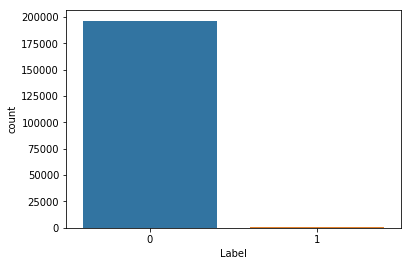

In [70]:
sns.countplot(data=credit, x = 'Label', label='Count')

NFraud, Fraud = len(credit[credit['Label']==0]), len(credit[credit['Label']==1])
print('Number of Fraud Txns: ', Fraud)
print('Number of non-Fraud Txns: ', NFraud)

In [71]:
print('Percentage of Fraudulent transactions:',Fraud/len(credit)*100,'%')
print('Percentage of non-fraudulent txns:', NFraud/len(credit)*100,'%')

Percentage of Fraudulent transactions: 0.5914555168784911 %
Percentage of non-fraudulent txns: 99.4085444831215 %


# 2) Imbalanced Data
Data is very much imbalanced with fraud txns constituting only .17%.

In [72]:
Fraud = credit[credit['Label']==1]
NFraud = credit[credit['Label']==0]

In [73]:
len(Fraud), len(NFraud)

(1169, 196479)

In [74]:
Fraud.transactionAmount.max(), Fraud.transactionAmount.min(), NFraud.transactionAmount.max(), NFraud.transactionAmount.min()

(999999.0, 4.99, 8999998.0, 0.01)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


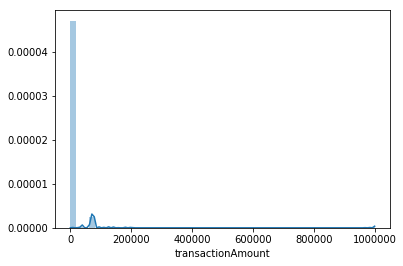

In [75]:
sns.distplot(Fraud.transactionAmount)

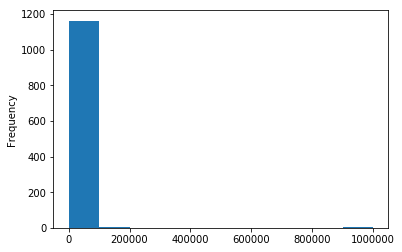

In [76]:
Fraud.transactionAmount.plot.hist()

In [77]:
#Most of the fraud transaction amounts are < 2000. The frequenct amounts are in the range of 0-500

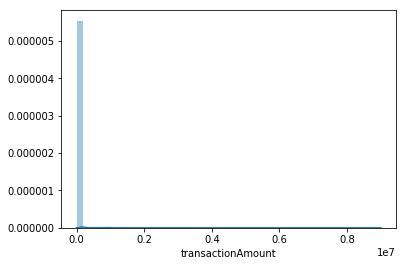

In [78]:
sns.distplot(NFraud.transactionAmount)

In [79]:
credit_corr = credit.corr()

In [80]:
credit_corr.Label[(abs(credit_corr.Label) >= 0.01) & (credit_corr.Label !=1)].sort_values()

localHour - Class000_LogOdds                 -0.034939
accountAge                                   -0.026633
paymentBillingState - Class000_LogOdds       -0.022324
cardType_AMEX                                -0.019495
accountState - Class000_LogOdds              -0.018557
cvvVerifyResult_0                            -0.018173
cardType_0                                   -0.016149
paymentInstrumentType_PAYPAL                 -0.016146
shipping_billing_postalCode_mismatchFlag     -0.015025
isUserRegistered                             -0.014782
paymentInstrumentAgeInAccount                -0.014528
transactionCurrencyCode - Class000_LogOdds   -0.012712
numPaymentRejects1Day                         0.011277
cardType_VISA                                 0.012879
cardType_DISCOVER                             0.015961
paymentInstrumentType_CREDITCARD              0.016149
digitalItemCount                              0.018371
cvvVerifyResult_M                             0.019464
is_highAmo

In [81]:
new_credit_corr = credit_corr[(abs(credit_corr.Label) >= 0.01) & (credit_corr.Label !=1)]

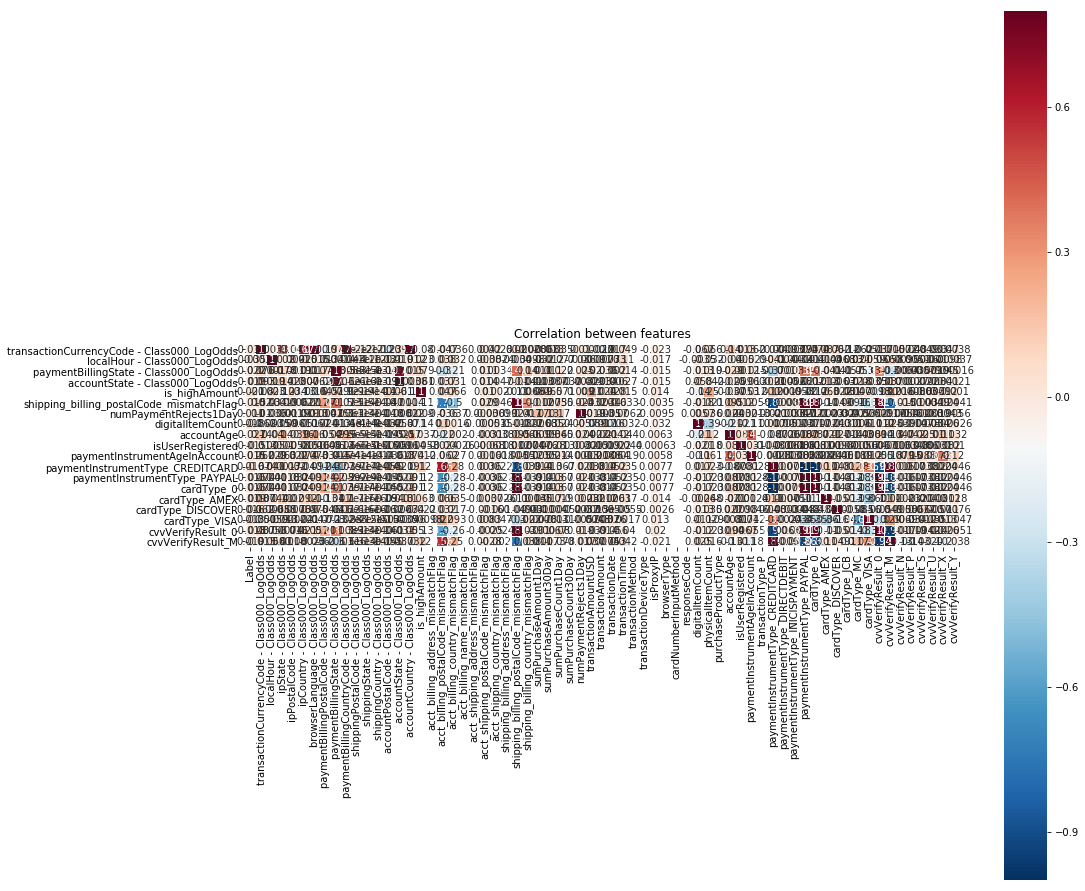

In [82]:
plt.figure(figsize=(16, 16))

sns.heatmap(new_credit_corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='RdBu_r',linecolor="white")
plt.title('Correlation between features');

In [83]:
credit.head()

,Label,transactionCurrencyCode - Class000_LogOdds,localHour - Class000_LogOdds,ipState - Class000_LogOdds,ipPostalCode - Class000_LogOdds,ipCountry - Class000_LogOdds,browserLanguage - Class000_LogOdds,paymentBillingPostalCode - Class000_LogOdds,paymentBillingState - Class000_LogOdds,paymentBillingCountryCode - Class000_LogOdds,...,cardType_MC,cardType_VISA,cvvVerifyResult_0,cvvVerifyResult_M,cvvVerifyResult_N,cvvVerifyResult_P,cvvVerifyResult_S,cvvVerifyResult_U,cvvVerifyResult_X,cvvVerifyResult_Y
0,0,4.833330,4.745402,1.218157,1.259543,4.899422,4.829913,5.064533,1.312186,4.876319,...,0,1,0,0,0,0,0,0,1,0
1,0,5.166279,4.921349,4.035601,3.981118,5.132626,5.166234,0.538996,4.401370,5.141895,...,1,0,0,1,0,0,0,0,0,0
2,0,5.166279,4.742303,3.314186,5.008490,5.132626,5.166234,5.064533,3.056357,5.141895,...,1,0,0,1,0,0,0,0,0,0
3,0,4.033379,4.745402,3.529398,1.324925,4.050173,3.938570,5.064533,3.331154,4.068874,...,0,1,0,1,0,0,0,0,0,0
4,0,5.166279,4.876771,3.529398,2.693451,4.050173,5.166234,5.412885,5.563677,4.068874,...,0,0,1,0,0,0,0,0,0,0


In [32]:
credit.transactionType_P.value_counts()

1    138721
Name: transactionType_P, dtype: int64

In [34]:
scaled_cols = credit.drop(['Label','paymentInstrumentType_CREDITCARD',
       'paymentInstrumentType_DIRECTDEBIT',
       'paymentInstrumentType_INICISPAYMENT', 'paymentInstrumentType_PAYPAL',
       'cardType_0', 'cardType_AMEX', 'cardType_DISCOVER', 'cardType_JCB',
       'cardType_MC', 'cardType_VISA', 'cvvVerifyResult_0',
       'cvvVerifyResult_M', 'cvvVerifyResult_N', 'cvvVerifyResult_P',
       'cvvVerifyResult_S', 'cvvVerifyResult_U', 'cvvVerifyResult_X',
       'cvvVerifyResult_Y', 'transactionType_P'], axis=1).columns
scaled_cols

Index(['transactionCurrencyCode - Class000_LogOdds',
       'localHour - Class000_LogOdds', 'ipState - Class000_LogOdds',
       'ipPostalCode - Class000_LogOdds', 'ipCountry - Class000_LogOdds',
       'browserLanguage - Class000_LogOdds',
       'paymentBillingPostalCode - Class000_LogOdds',
       'paymentBillingState - Class000_LogOdds',
       'paymentBillingCountryCode - Class000_LogOdds',
       'shippingPostalCode - Class000_LogOdds',
       'shippingState - Class000_LogOdds',
       'shippingCountry - Class000_LogOdds',
       'accountPostalCode - Class000_LogOdds',
       'accountState - Class000_LogOdds', 'accountCountry - Class000_LogOdds',
       'is_highAmount', 'acct_billing_address_mismatchFlag',
       'acct_billing_postalCode_mismatchFlag',
       'acct_billing_country_mismatchFlag', 'acct_billing_name_mismatchFlag',
       'acct_shipping_address_mismatchFlag',
       'acct_shipping_postalCode_mismatchFlag',
       'acct_shipping_country_mismatchFlag',
       'shippin

In [36]:
from sklearn.preprocessing import StandardScaler

for cols in scaled_cols:
    print('column:', cols)
    credit[cols] = StandardScaler().fit_transform(credit[cols].values.reshape(-1, 1))
    testcredit[cols] = StandardScaler().fit_transform(testcredit[cols].values.reshape(-1, 1))

column: transactionCurrencyCode - Class000_LogOdds
column: localHour - Class000_LogOdds
column: ipState - Class000_LogOdds
column: ipPostalCode - Class000_LogOdds
column: ipCountry - Class000_LogOdds
column: browserLanguage - Class000_LogOdds
column: paymentBillingPostalCode - Class000_LogOdds
column: paymentBillingState - Class000_LogOdds
column: paymentBillingCountryCode - Class000_LogOdds
column: shippingPostalCode - Class000_LogOdds
column: shippingState - Class000_LogOdds
column: shippingCountry - Class000_LogOdds
column: accountPostalCode - Class000_LogOdds
column: accountState - Class000_LogOdds
column: accountCountry - Class000_LogOdds
column: is_highAmount
column: acct_billing_address_mismatchFlag
column: acct_billing_postalCode_mismatchFlag
column: acct_billing_country_mismatchFlag
column: acct_billing_name_mismatchFlag
column: acct_shipping_address_mismatchFlag
column: acct_shipping_postalCode_mismatchFlag
column: acct_shipping_country_mismatchFlag


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversio

column: shipping_billing_address_mismatchFlag
column: shipping_billing_postalCode_mismatchFlag
column: shipping_billing_country_mismatchFlag
column: sumPurchaseAmount1Day
column: sumPurchaseAmount30Day
column: sumPurchaseCount1Day
column: sumPurchaseCount30Day
column: numPaymentRejects1Day


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversio

column: transactionAmountUSD
column: transactionAmount
column: transactionDate
column: transactionTime
column: transactionMethod
column: transactionDeviceType


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversi

column: isProxyIP
column: browserType
column: cardNumberInputMethod
column: responseCode
column: digitalItemCount
column: physicalItemCount
column: purchaseProductType
column: accountAge
column: isUserRegistered
column: paymentInstrumentAgeInAccount


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConv

In [37]:
credit.head()

,Label,transactionCurrencyCode - Class000_LogOdds,localHour - Class000_LogOdds,ipState - Class000_LogOdds,ipPostalCode - Class000_LogOdds,ipCountry - Class000_LogOdds,browserLanguage - Class000_LogOdds,paymentBillingPostalCode - Class000_LogOdds,paymentBillingState - Class000_LogOdds,paymentBillingCountryCode - Class000_LogOdds,...,cardType_MC,cardType_VISA,cvvVerifyResult_0,cvvVerifyResult_M,cvvVerifyResult_N,cvvVerifyResult_P,cvvVerifyResult_S,cvvVerifyResult_U,cvvVerifyResult_X,cvvVerifyResult_Y
0,0,-0.102635,-0.062549,-2.490107,-1.039524,0.207575,0.067953,0.599081,-3.132469,0.146217,...,0,1,0,0,0,0,0,0,1,0
1,0,0.414417,0.421219,0.220314,0.778101,0.502843,0.498738,-1.637774,-0.026655,0.501640,...,1,0,0,1,0,0,0,0,0,0
2,0,0.414417,-0.071070,-0.473698,1.464239,0.502843,0.498738,0.599081,-1.378909,0.501640,...,1,0,0,1,0,0,0,0,0,0
3,0,-1.344916,-0.062549,-0.266661,-0.995858,-0.867687,-1.073745,0.599081,-1.102632,-0.934395,...,0,1,0,1,0,0,0,0,0,0
4,0,0.414417,0.298651,-0.266661,-0.081878,-0.867687,0.498738,0.771262,1.141909,-0.934395,...,0,0,1,0,0,0,0,0,0,0


# 4) Machine Learning Models

### Model, Predict & Solve
This problem is a Classification problem. We want to identify relationship between output (Fraud or non-Fraudulent) with 
other variables or features (PCA components). We are also perfoming supervised learning as we are training our model with a given dataset. 

With these two criteria - Supervised Learning plus Classification, we can narrow down our choice of models to a few. These include:


X_train = credit.drop('Label', axis=1)
y_train = credit.Label

X_test = testcredit.drop('Label', axis=1)
y_test = testcredit.Label

In [85]:
X = credit.drop('Label', axis=1)
y = credit.Label

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(132424, 66) (132424,) (65224, 66) (65224,)


In [88]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(774, 131650, 0.005844861958557361, 0.9941551380414426)

In [89]:
len(y_test[y_test == 1]), len(y_test[y_test == 0]), len(y_test[y_test == 1])/len(y_test), len(y_test[y_test == 0])/len(y_test)

(395, 64829, 0.006056052986630688, 0.9939439470133693)

In [96]:
def metrics_calc(actual, predicted, predicted_prob):
    # Compute confusion matrix
    from sklearn.metrics import auc
    cm = confusion_matrix(actual, predicted)
    TP = cm[1,1]
    TN = cm[0,0]
    FN = cm[1,0]
    FP = cm[0,1]
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    miscalc_rate = (FP+FN)/(TP+FP+TN+FN)
    tpr = TP/(TP+FN)
    fpr = FP/(FP+TN)
    ppv = TP/(TP+FP)
    prevalence = TP/(TP+FP+TN+FN)  
    null_accuracy = max(predicted.mean(), 1 - predicted.mean())
    f1_score = 2 * (ppv*tpr)/(ppv+tpr)               


    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(actual, predicted_prob[:,1])
    # calculate precision-recall AUC
    area_under_curve = auc(recall, precision)
    # calculate average precision score
    av_pr_score = average_precision_score(actual, predicted)
    #print('-------------------------------------')
    #print('Recall (TPR) = ', tpr)
    #print('Fallout (FPR) = ', fpr)
    #print('Precision (PPV) = ', ppv)
    #print('F1 Score = ', f1_score)
    #print('Area Under Curve = ', area_under_curve)
    #print('Average Precision Score', av_pr_score)    
    #print('-------------------------------------')
    #print('Accuracy = ', accuracy)
    #print('null_accuracy = ', null_accuracy)
    #print('miscalc_rate = ',miscalc_rate)    

    
    return FN, FP, fpr, tpr, ppv, f1_score, area_under_curve

## 4.2 Logistic Regression

The classes are highly imbalanced. Class of 0 indicates that the transaction was considered normal and a class of 1 indicates that the transaction was fraudulent.

Since fraud txns comprises of only .17% of the total transactions, we cannot consider accuracy as an appropriate measure for the model

Logistic Regression Training Score: 
 99.42
Logistic Regression Test Score: 
 99.39
Accuracy: 
 0.9939439470133693
Confusion Matrix: 
 [[64829     0]
 [  395     0]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.99      1.00      1.00     64829
          1       0.00      0.00      0.00       395

avg / total       0.99      0.99      0.99     65224



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


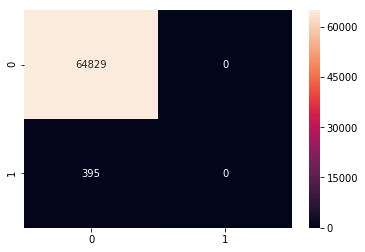

In [97]:
# Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)
log_predicted_prob = logreg.predict_proba(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [98]:
pd.crosstab(y_test, log_predicted,  rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,All
Actual,,
0,64829,64829
1,395,395
All,65224,65224


We have split the data into a training and a testing set at a ratio of 4:1, trained a Logistic Regression on the training set, and predicted the outcome on the testing set. The result of this prediction is depicted in the confusion matrix. We can see that almost all non-fraudulent transactions are also recognized as such. About 2/3 of all frauds are detected, but quite many are not recognized. The confusion matrix is a convenient way of illustrating the behavior of a classifier.

- The **Precision** denotes the probability that a transaction that is classified as fraud is truly a fraud.
- The **Recall** (aka. True Positive Rate) is the probability that a true fraud is recognized by the classifier.
- The **Fallout** (aka. False Positive Rate) is the probability that a non-fraud is wrongly classified as a fraud.

These numbers provide a more tangible characterization of a classifier. When tuning the parameters for a classifier, we need to ask ourselves what we expect of a "good" classifier.

- The Precision should be large (close to 1). A precision close to 0 means that a fraud alert will turn out as a mistake in the majority of the cases. This can be annoying for customers.
- The Recall should be close to 1. We want to detect frauds with a high probability. A recall of ~60% like for the classifier above is certainly not good enough - many frauds will go undetected. We definitly aim for something higher, 80% would be quite good! (Note that since frauds are often non-singular events on an account, it can be good enough to detect at least one out of two frauds - with a Recall of 80% this means that the probability that two consecutive frauds go undetected is as low as 4% already!)
- The Fallout should be very low. Customers would not want to receive a fraud alert every week. I speculate that a Fallout less than 0.1% would be adequate - for an average daily number of 3 transactions this would result in 1 wrong alert per year. Here we will actually aim for the even better fallout <3e-4.

In [99]:
log_fn, log_fp, log_fpr, log_tpr, log_ppv, log_f1, log_auc = metrics_calc(y_test, log_predicted, log_predicted_prob)
print('False Positive (incorrectly predicted as fraud) =     ',log_fp)
print('False Negative (incorrectly predicted as normal) =     ',log_fn)
print('Precision =     {:.3f}'.format(log_ppv))
print('Recall (TPR) =  {:.3f}'.format(log_tpr))
print('Fallout (FPR) = {:.3e}'.format(log_fpr))
print('F1 = {:.3e}'.format(log_f1))
print('AUC = {:.3e}'.format(log_auc))

False Positive (incorrectly predicted as fraud) =      0
False Negative (incorrectly predicted as normal) =      395
Precision =     nan
Recall (TPR) =  0.000
Fallout (FPR) = 0.000e+00
F1 = nan
AUC = 6.465e-03


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


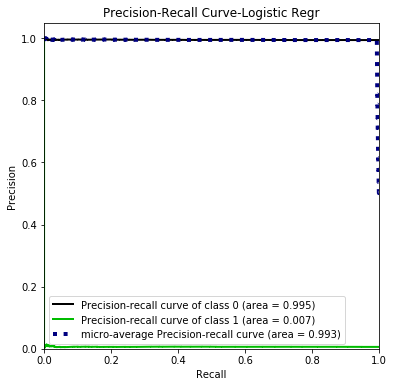

In [100]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, log_predicted_prob, title='Precision-Recall Curve-Logistic Regr', figsize=(6,6))
print()

## 4.3) Gaussian Naive Bayes


Gaussian Score: 
 99.3
Gaussian Test Score: 
 99.3
[[64766    63]
 [  395     0]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     64829
          1       0.00      0.00      0.00       395

avg / total       0.99      0.99      0.99     65224



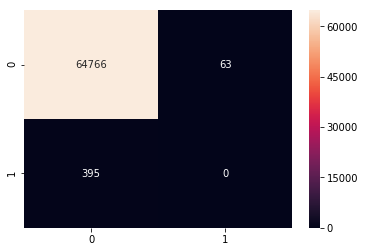

In [101]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)
gauss_predicted_prob = gaussian.predict_proba(X_test)
gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")


In [105]:
gauss_fn, gauss_fp, gauss_fpr, gauss_tpr, gauss_ppv, gauss_f1, gauss_auc = metrics_calc(y_test, gauss_predicted, gauss_predicted_prob)
print('False Positive (incorrectly predicted as fraud) =     ',gauss_fp)
print('False Negative (incorrectly predicted as normal) =     ',gauss_fn)
print('Precision =     {:.3f}'.format(gauss_ppv))
print('Recall (TPR) =  {:.3f}'.format(gauss_tpr))
print('Fallout (FPR) = {:.3e}'.format(gauss_fpr))
print('F1 = {:.3e}'.format(gauss_f1))
print('AUC = {:.3e}'.format(gauss_auc))

False Positive (incorrectly predicted as fraud) =      63
False Negative (incorrectly predicted as normal) =      395
Precision =     0.000
Recall (TPR) =  0.000
Fallout (FPR) = 9.718e-04
F1 = nan
AUC = 9.644e-03


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


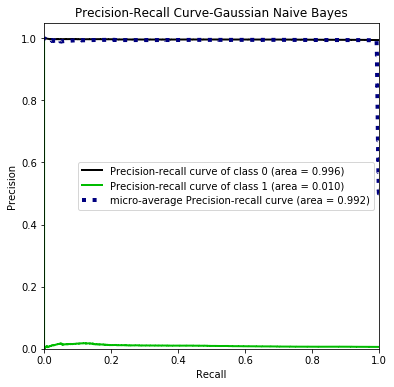

In [106]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, gauss_predicted_prob, title='Precision-Recall Curve-Gaussian Naive Bayes', figsize=(6,6))
print()

## 4.4) Decision Tree

[[64418   411]
 [  326    69]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     64829
          1       0.14      0.17      0.16       395

avg / total       0.99      0.99      0.99     65224



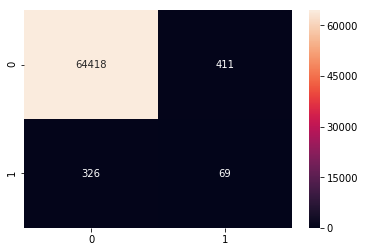

In [107]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
#Predict Output
dtree_predicted = decision_tree.predict(X_test)
dtree_predicted_prob = decision_tree.predict_proba(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train)* 100, 2)
decision_tree_score_test = round(decision_tree.score(X_test, y_test)* 100, 2)
print(confusion_matrix(y_test,dtree_predicted))
print(classification_report(y_test,dtree_predicted))
sns.heatmap(confusion_matrix(y_test,dtree_predicted),annot=True,fmt="d")


In [108]:
dtree_fn, dtree_fp, dtree_fpr, dtree_tpr, dtree_ppv, dtree_f1, dtree_auc = metrics_calc(y_test, dtree_predicted, dtree_predicted_prob)

print('False Positive (incorrectly predicted as fraud) =     ',dtree_fp)
print('False Negative (incorrectly predicted as normal) =    ',dtree_fn)
print('Precision =     {:.3f}'.format(dtree_ppv))
print('Recall (TPR) =  {:.3f}'.format(dtree_tpr))
print('Fallout (FPR) = {:.3e}'.format(dtree_fpr))
print('F1 = {:.3e}'.format(dtree_f1))
print('AUC = {:.3e}'.format(dtree_auc))

False Positive (incorrectly predicted as fraud) =      411
False Negative (incorrectly predicted as normal) =     326
Precision =     0.144
Recall (TPR) =  0.175
Fallout (FPR) = 6.340e-03
F1 = 1.577e-01
AUC = 1.617e-01


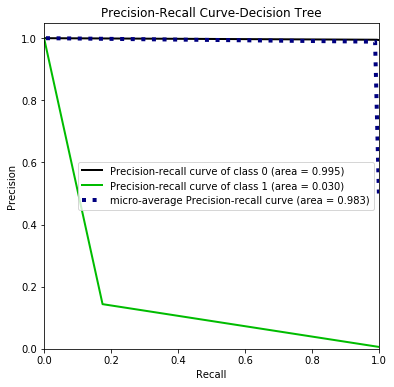

In [109]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, dtree_predicted_prob, title='Precision-Recall Curve-Decision Tree', figsize=(6,6))
print()

## 4.5) Random Forest

Accuracy: 
 0.9943119097264811
[[64817    12]
 [  359    36]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     64829
          1       0.75      0.09      0.16       395

avg / total       0.99      0.99      0.99     65224



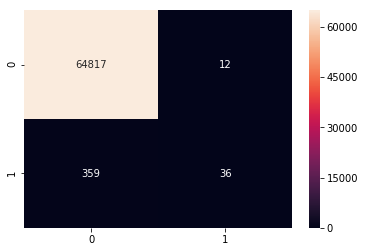

In [110]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)
rf_predicted_prob = random_forest.predict_proba(X_test)

print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")


In [111]:
rf_fn, rf_fp, rf_fpr, rf_tpr, rf_ppv, rf_f1, rf_auc = metrics_calc(y_test, rf_predicted, rf_predicted_prob)

print('False Positive (incorrectly predicted as fraud) =    ',rf_fp)
print('False Negative (incorrectly predicted as normal) =     ',rf_fn)
print('Precision =     {:.3f}'.format(rf_ppv))
print('Recall (TPR) =  {:.3f}'.format(rf_tpr))
print('Fallout (FPR) = {:.3e}'.format(rf_fpr))
print('F1 = {:.3e}'.format(rf_f1))
print('AUC = {:.3e}'.format(rf_auc))

False Positive (incorrectly predicted as fraud) =     12
False Negative (incorrectly predicted as normal) =      359
Precision =     0.750
Recall (TPR) =  0.091
Fallout (FPR) = 1.851e-04
F1 = 1.625e-01
AUC = 2.049e-01


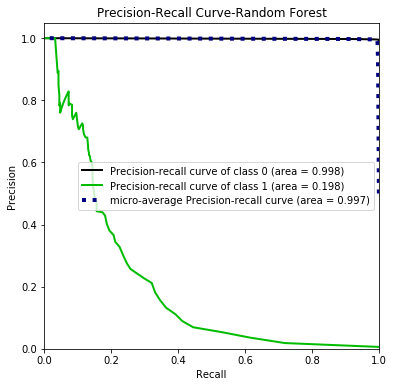

In [112]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, rf_predicted_prob, title='Precision-Recall Curve-Random Forest', figsize=(6,6))
print()

## 4.6) Neural Networks

Accuracy: 
 0.9939439470133693
[[64829     0]
 [  395     0]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     64829
          1       0.00      0.00      0.00       395

avg / total       0.99      0.99      0.99     65224



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


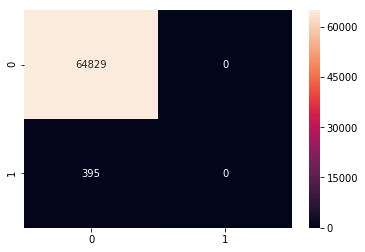

In [113]:
# Neural Networks

neural = MLPClassifier(hidden_layer_sizes=30,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size='auto',
                     max_iter=200,
                     random_state=1337,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='constant',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)
neural.fit(X_train, y_train)
#Predict Output
nn_predicted = neural.predict(X_test)
nn_predicted_prob = neural.predict_proba(X_test)
print('Accuracy: \n', accuracy_score(y_test, nn_predicted))
print(confusion_matrix(y_test,nn_predicted))
print(classification_report(y_test,nn_predicted))

sns.heatmap(confusion_matrix(y_test,nn_predicted),annot=True,fmt="d")

In [116]:
nn_fn, nn_fp, nn_fpr, nn_tpr, nn_ppv, nn_f1, nn_auc = metrics_calc(y_test, nn_predicted, nn_predicted_prob)

print('False Positive (incorrectly predicted as fraud) =     ',nn_fp)
print('False Negative (incorrectly predicted as normal) =     ',nn_fn)
print('Precision =     {:.3f}'.format(nn_ppv))
print('Recall (TPR) =  {:.3f}'.format(nn_tpr))
print('Fallout (FPR) = {:.3e}'.format(nn_fpr))
print('F1 = {:.3e}'.format(nn_f1))
print('AUC = {:.3e}'.format(nn_auc))

False Positive (incorrectly predicted as fraud) =      0
False Negative (incorrectly predicted as normal) =      395
Precision =     nan
Recall (TPR) =  0.000
Fallout (FPR) = 0.000e+00
F1 = nan
AUC = 5.030e-01


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


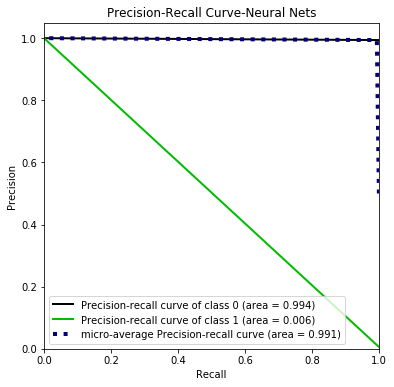

In [117]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, nn_predicted_prob, title='Precision-Recall Curve-Neural Nets', figsize=(6,6))
print()

## 4.7) XGBoost
No Normalization of data is required...

## Grid Search - F1 scoring

In [118]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(774, 131650, 0.005844861958557361, 0.9941551380414426)

In [119]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tried in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 
xgb_clf = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5)

In [120]:
xgb_clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6], 'min_child_weight': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [121]:
xgb_clf.best_params_

{'max_depth': 6, 'min_child_weight': 3}

In [122]:
xgb_clf.grid_scores_

[mean: 0.06151, std: 0.02286, params: {'max_depth': 1, 'min_child_weight': 1},
 mean: 0.06151, std: 0.02286, params: {'max_depth': 1, 'min_child_weight': 2},
 mean: 0.06151, std: 0.02286, params: {'max_depth': 1, 'min_child_weight': 3},
 mean: 0.06147, std: 0.02291, params: {'max_depth': 1, 'min_child_weight': 4},
 mean: 0.11639, std: 0.04045, params: {'max_depth': 2, 'min_child_weight': 1},
 mean: 0.10735, std: 0.03273, params: {'max_depth': 2, 'min_child_weight': 2},
 mean: 0.10743, std: 0.03875, params: {'max_depth': 2, 'min_child_weight': 3},
 mean: 0.09625, std: 0.02829, params: {'max_depth': 2, 'min_child_weight': 4},
 mean: 0.17702, std: 0.05657, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.17328, std: 0.05063, params: {'max_depth': 3, 'min_child_weight': 2},
 mean: 0.17948, std: 0.04379, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.17129, std: 0.04793, params: {'max_depth': 3, 'min_child_weight': 4},
 mean: 0.19937, std: 0.05403, params: {'max_depth': 

In [123]:
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4,8]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight':3}
xgb_clf = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
xgb_clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=6, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'subsample': [0.8, 0.9, 1], 'max_delta_step': [0, 1, 2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [124]:
xgb_clf.best_params_

{'max_delta_step': 0, 'subsample': 1}

In [125]:
xgb_clf.grid_scores_

[mean: 0.24254, std: 0.04256, params: {'max_delta_step': 0, 'subsample': 0.8},
 mean: 0.23707, std: 0.05594, params: {'max_delta_step': 0, 'subsample': 0.9},
 mean: 0.25750, std: 0.04631, params: {'max_delta_step': 0, 'subsample': 1},
 mean: 0.24254, std: 0.04256, params: {'max_delta_step': 1, 'subsample': 0.8},
 mean: 0.23707, std: 0.05594, params: {'max_delta_step': 1, 'subsample': 0.9},
 mean: 0.25750, std: 0.04631, params: {'max_delta_step': 1, 'subsample': 1},
 mean: 0.24254, std: 0.04256, params: {'max_delta_step': 2, 'subsample': 0.8},
 mean: 0.23707, std: 0.05594, params: {'max_delta_step': 2, 'subsample': 0.9},
 mean: 0.25750, std: 0.04631, params: {'max_delta_step': 2, 'subsample': 1},
 mean: 0.24254, std: 0.04256, params: {'max_delta_step': 4, 'subsample': 0.8},
 mean: 0.23707, std: 0.05594, params: {'max_delta_step': 4, 'subsample': 0.9},
 mean: 0.25750, std: 0.04631, params: {'max_delta_step': 4, 'subsample': 1},
 mean: 0.24254, std: 0.04256, params: {'max_delta_step': 8, 

In [126]:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]}
fix_params['max_delta_step'] = 0

fix_params['subsample'] = 1
xgb_clf = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
xgb_clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=6, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [127]:
xgb_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.25, max_delta_step=0,
       max_depth=6, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [128]:
xgb_clf.best_params_

{'learning_rate': 0.25}

In [129]:
xgb_clf.grid_scores_

[mean: 0.14167, std: 0.05745, params: {'learning_rate': 0.05},
 mean: 0.19658, std: 0.04424, params: {'learning_rate': 0.1},
 mean: 0.22604, std: 0.04828, params: {'learning_rate': 0.15},
 mean: 0.25750, std: 0.04631, params: {'learning_rate': 0.2},
 mean: 0.26048, std: 0.05283, params: {'learning_rate': 0.25},
 mean: 0.25094, std: 0.05620, params: {'learning_rate': 0.3},
 mean: 0.24786, std: 0.04605, params: {'learning_rate': 0.35}]

In [130]:
fix_params['learning_rate'] = 0.25
params_final =  fix_params
print(params_final)

{'learning_rate': 0.25, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight': 3, 'max_delta_step': 0, 'subsample': 1}


In [131]:
xgb_final_clf = xgb.XGBClassifier(**params_final)

In [132]:
xgb_final_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.25, max_delta_step=0,
       max_depth=6, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [133]:
xgb_predicted = xgb_final_clf.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [134]:
xgb_predicted_prob = xgb_final_clf.predict_proba(X_test)

In [135]:
len(xgb_predicted[xgb_predicted==1]), len(xgb_predicted[xgb_predicted==0])

(79, 65145)

Accuracy: 
 0.994327241506194
[[64802    27]
 [  343    52]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     64829
          1       0.66      0.13      0.22       395

avg / total       0.99      0.99      0.99     65224



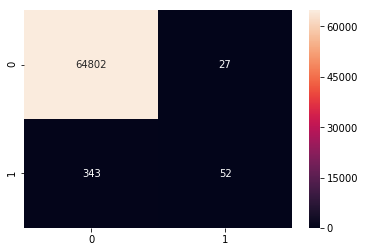

In [136]:
print('Accuracy: \n', accuracy_score(y_test, xgb_predicted))
print(confusion_matrix(y_test,xgb_predicted))
print(classification_report(y_test,xgb_predicted))

sns.heatmap(confusion_matrix(y_test,xgb_predicted),annot=True,fmt="d")

In [137]:
xgb_fn, xgb_fp, xgb_fpr, xgb_tpr, xgb_ppv, xgb_f1, xgb_auc = metrics_calc(y_test, xgb_predicted, xgb_predicted_prob)

print('False Positive (incorrectly predicted as fraud) =     ',xgb_fp)
print('False Negative (incorrectly predicted as normal) =     ',xgb_fn)
print('Precision =     {:.3f}'.format(xgb_ppv))
print('Recall (TPR) =  {:.3f}'.format(xgb_tpr))
print('Fallout (FPR) = {:.3e}'.format(xgb_fpr))
print('F1 = {:.3e}'.format(xgb_f1))
print('AUC = {:.3e}'.format(xgb_auc))

False Positive (incorrectly predicted as fraud) =      27
False Negative (incorrectly predicted as normal) =      343
Precision =     0.658
Recall (TPR) =  0.132
Fallout (FPR) = 4.165e-04
F1 = 2.194e-01
AUC = 2.373e-01


# Classification Metrics

Reference: http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf
When evaluating binary decision problems, it is recommended to use Receiver Operator Characteristic (ROC) curves, which show how the number of correctly classified positive examples varies with the number of incorrectly classified negative examples. However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution. Drummond and Holte (2000;2004) have recommended using cost curves to addressthis issue. Cost curves are an excellent alternative to ROC curves.

Precision-Recall (PR) curves, often used in Information Retrieval (Manning & Schutze, 1999; Raghavan et al., 1989), have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution (Bockhorst & Craven, 2005; Bunescu et al., 2004; Davis et al., 2005; Goadrich et al., 2004; Kok & Domingos, 2005; Singla & Domingos, 2005). An important difference between ROC space and PR space is the visual representation of the curves. Looking at PR curves can expose differences between algorithms that are not apparent in ROC space. 

In a binary decision problem, a classifier labels examples as either positive or negative. The decision made by the classifier can be represented in a structure known as a confusion matrix or contingency table. The confusion matrix has four categories: True positives (TP) are examples correctly labeled as positives. False positives (FP) refer to negative examples incorrectly labeled as positive. True negatives (TN) correspond to negatives correctly labeled as negative. Finally, false negatives (FN) refer to positive examples incorrectly labeled as negative.

The confusion matrix can be used to construct a point in either ROC space or PR space. Given the confusion matrix, we are able to define the metrics used in each space as in Figure 2(b). In ROC space, one plots the False Positive Rate (FPR) on the x-axis and the True Positive Rate (TPR) on the y-axis. The FPR measures the fraction of negative examples that are misclassified as positive. The TPR measures the fraction of positive examples that are correctly labeled. In PR space, one plots Recall on the x-axis and Precision on the y-axis. Recall is the same as TPR, whereas Precision measures that fraction of examples classified as
positive that are truly positive. Figure 2(b) gives the definitions for each metric. We will treat the metrics as functions that act on the underlying confusion matrix which defines a point in either ROC space or PR space. Thus, given a confusion matrix A, RECALL(A) returns the Recall associated with A.

https://scikit-learn.org/stable/modules/model_evaluation.html


- Accuracy: How often the classifier is correct = (T P + T N) / (T P + F P + T N + F N)  
- Misclassification Rate: How often the classifier is incorrect = (F P + F N) / (T P + F P + T N + F N)  
- True Positive Rate/Recall/Sensitivity : When it's actually yes, how often does it predict yes?  T P / (T P + F N)  
- Precision or positive predictive value (PPV): When it predicts yes, how often is it correct?  T P / (T P + F P)  
- Fallout/False Positive Rate: When it's actually no, how often does it predict yes? F P / (F P + T N)  
- Prevalence: How often does the yes condition actually occur in our sample? T P / (T P + F P + T N + F N)  
- Null Error Rate: This is how often you would be wrong if you always predicted the majority class. 
- Cohen's Kappa: This is essentially a measure of how well the classifier performed as compared to how well it would have performed simply by chance.
- F Score: This is a weighted average of the true positive rate (recall) and precision 2 * Precision * Recall / (Precision + Recall)

<b> Accuracy Paradox </b> https://en.wikipedia.org/wiki/Accuracy_paradox 

The accuracy paradox for predictive analytics states that predictive models with a given level of accuracy may have greater predictive power than models with higher accuracy. It may be better to avoid the accuracy metric in favor of other metrics such as precision and recall.

<b> Receiver Operating Characteristic </b> https://en.wikipedia.org/wiki/Receiver_operating_characteristic

A receiver operating characteristic curve, i.e., ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

# Precision Recall Curve
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets, 2015. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/



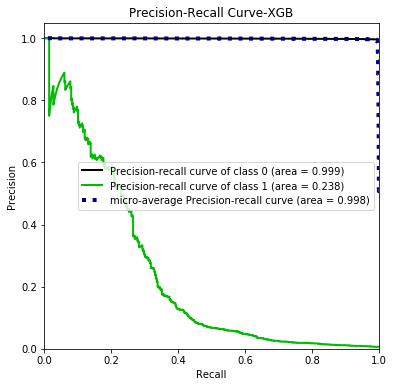

In [138]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, xgb_predicted_prob, title='Precision-Recall Curve-XGB', figsize=(6,6))
print()

# 5) LGBM Classifier

In [139]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(774, 131650, 0.005844861958557361, 0.9941551380414426)

In [140]:
len(y_test[y_test == 1]), len(y_test[y_test == 0]), len(y_test[y_test == 1])/len(y_test), len(y_test[y_test == 0])/len(y_test)

(395, 64829, 0.006056052986630688, 0.9939439470133693)

In [141]:
from sklearn import ensemble

# Importing modules
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, mean_squared_error

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GroupKFold
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import lightgbm as lgb

In [142]:
lgbmodel = lgb.LGBMClassifier(
    num_leaves=31,
    learning_rate=0.03,
    n_estimators=1000,
    subsample=.9,
    colsample_bytree=.9,
    random_state=42
)
lgbmodel.fit(
    X_train, y_train, 
    verbose=100
)

lgb_pred = lgbmodel.predict(X_test)
lgb_pred_proba = lgbmodel.predict_proba(X_test)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [143]:
lgb_fn, lgb_fp, lgb_fpr, lgb_tpr, lgb_ppv, lgb_f1, lgb_auc = metrics_calc(y_test, lgb_pred, lgb_pred_proba)

print('False Positive (incorrectly predicted as fraud) =     ',lgb_fp)
print('False Negative (incorrectly predicted as normal) =     ',lgb_fn)
print('Precision =     {:.3f}'.format(lgb_ppv))
print('Recall (TPR) =  {:.3f}'.format(lgb_tpr))
print('Fallout (FPR) = {:.3e}'.format(lgb_fpr))
print('F1 = {:.3e}'.format(lgb_f1))
print('AUC = {:.3e}'.format(lgb_auc))

False Positive (incorrectly predicted as fraud) =      22
False Negative (incorrectly predicted as normal) =      340
Precision =     0.714
Recall (TPR) =  0.139
Fallout (FPR) = 3.394e-04
F1 = 2.331e-01
AUC = 2.544e-01


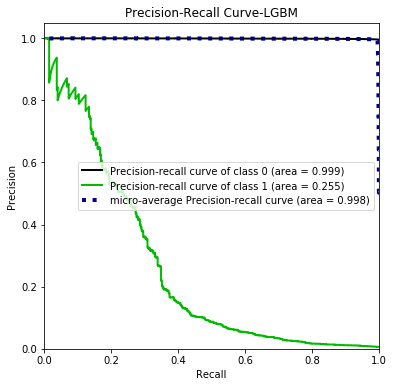

In [144]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, lgb_pred_proba, title='Precision-Recall Curve-LGBM', figsize=(6,6))
print()

### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93808 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 2 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 36 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 141 were correctly predicted as FRAUD. 

# 6) LightGBM classifier hyperparameter optimization via scikit-learn's GridSearchCV

In [145]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.600256
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761059	valid_0's binary_logloss: 0.524196
[3]	valid_0's auc: 0.757368	valid_0's binary_logloss: 0.46081
[4]	valid_0's auc: 0.76067	valid_0's binary_logloss: 0.407289
[5]	valid_0's auc: 0.761981	valid_0's binary_logloss: 0.361625
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344
[7]	valid_0's auc: 0.763113	valid_0's binary_logloss: 0.288325
[8]	valid_0's auc: 0.762287	valid_0's binary_logloss: 0.258697
[9]	valid_0's auc: 0.763469	valid_0's binary_logloss: 0.23279
[10]	valid_0's auc: 0.76367	valid_0's binary_logloss: 0.210058
[11]	valid_0's auc: 0.762132	valid_0's binary_logloss: 0.190032
Early stopping, best iteration is:
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.600276
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684519	valid_0's binary_logloss: 0.524217
[3]	valid_0's auc: 0.682506	valid_0's binary_logloss: 0.460852
[4]	valid_0's auc: 0.686214	valid_0's binary_logloss: 0.407315
[5]	valid_0's auc: 0.686084	valid_0's binary_logloss: 0.361621
[6]	valid_0's auc: 0.762888	valid_0's binary_logloss: 0.322305
[7]	valid_0's auc: 0.762763	valid_0's binary_logloss: 0.288294
[8]	valid_0's auc: 0.762908	valid_0's binary_logloss: 0.25867
[9]	valid_0's auc: 0.762997	valid_0's binary_logloss: 0.232781
[10]	valid_0's auc: 0.763018	valid_0's binary_logloss: 0.210057
[11]	valid_0's auc: 0.765064	valid_0's binary_logloss: 0.190054
[12]	valid_0's auc: 0.761304	valid_0's binary_logloss: 0.17236
[13]	valid_0's auc: 0.760175	valid_0's binary_logloss: 0.156723
[14]	valid_0's auc: 0.759963	valid_0's binary_logloss: 0.142856
[15]	valid_0's auc: 0.766429	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.600293
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760087	valid_0's binary_logloss: 0.524252
[3]	valid_0's auc: 0.761294	valid_0's binary_logloss: 0.460887
[4]	valid_0's auc: 0.764812	valid_0's binary_logloss: 0.407372
[5]	valid_0's auc: 0.768602	valid_0's binary_logloss: 0.36171
[6]	valid_0's auc: 0.770193	valid_0's binary_logloss: 0.322443
[7]	valid_0's auc: 0.767708	valid_0's binary_logloss: 0.288425
[8]	valid_0's auc: 0.76881	valid_0's binary_logloss: 0.258824
[9]	valid_0's auc: 0.773209	valid_0's binary_logloss: 0.232903
[10]	valid_0's auc: 0.770557	valid_0's binary_logloss: 0.210162
[11]	valid_0's auc: 0.771423	valid_0's binary_logloss: 0.190142
[12]	valid_0's auc: 0.773326	valid_0's binary_logloss: 0.172423
[13]	valid_0's auc: 0.774043	valid_0's binary_logloss: 0.156755
[14]	valid_0's auc: 0.776189	valid_0's binary_logloss: 0.142847
[15]	valid_0's auc: 0.775984	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.600256
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761059	valid_0's binary_logloss: 0.524196
[3]	valid_0's auc: 0.757368	valid_0's binary_logloss: 0.46081
[4]	valid_0's auc: 0.76067	valid_0's binary_logloss: 0.407289
[5]	valid_0's auc: 0.761981	valid_0's binary_logloss: 0.361625
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344
[7]	valid_0's auc: 0.763113	valid_0's binary_logloss: 0.288325
[8]	valid_0's auc: 0.762287	valid_0's binary_logloss: 0.258697
[9]	valid_0's auc: 0.763469	valid_0's binary_logloss: 0.23279
[10]	valid_0's auc: 0.76367	valid_0's binary_logloss: 0.210058
[11]	valid_0's auc: 0.762132	valid_0's binary_logloss: 0.190032
Early stopping, best iteration is:
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.600276
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684519	valid_0's binary_logloss: 0.524217
[3]	valid_0's auc: 0.682506	valid_0's binary_logloss: 0.460852
[4]	valid_0's auc: 0.686214	valid_0's binary_logloss: 0.407315
[5]	valid_0's auc: 0.686084	valid_0's binary_logloss: 0.361621
[6]	valid_0's auc: 0.762888	valid_0's binary_logloss: 0.322305
[7]	valid_0's auc: 0.762763	valid_0's binary_logloss: 0.288294
[8]	valid_0's auc: 0.762908	valid_0's binary_logloss: 0.25867
[9]	valid_0's auc: 0.762997	valid_0's binary_logloss: 0.232781
[10]	valid_0's auc: 0.763018	valid_0's binary_logloss: 0.210057
[11]	valid_0's auc: 0.765064	valid_0's binary_logloss: 0.190054
[12]	valid_0's auc: 0.761304	valid_0's binary_logloss: 0.17236
[13]	valid_0's auc: 0.760175	valid_0's binary_logloss: 0.156723
[14]	valid_0's auc: 0.759963	valid_0's binary_logloss: 0.142856
[15]	valid_0's auc: 0.766429	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.600293
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760087	valid_0's binary_logloss: 0.524252
[3]	valid_0's auc: 0.761294	valid_0's binary_logloss: 0.460887
[4]	valid_0's auc: 0.764812	valid_0's binary_logloss: 0.407372
[5]	valid_0's auc: 0.768602	valid_0's binary_logloss: 0.36171
[6]	valid_0's auc: 0.770193	valid_0's binary_logloss: 0.322443
[7]	valid_0's auc: 0.767708	valid_0's binary_logloss: 0.288425
[8]	valid_0's auc: 0.76881	valid_0's binary_logloss: 0.258824
[9]	valid_0's auc: 0.773209	valid_0's binary_logloss: 0.232903
[10]	valid_0's auc: 0.770557	valid_0's binary_logloss: 0.210162
[11]	valid_0's auc: 0.771423	valid_0's binary_logloss: 0.190142
[12]	valid_0's auc: 0.773326	valid_0's binary_logloss: 0.172423
[13]	valid_0's auc: 0.774043	valid_0's binary_logloss: 0.156755
[14]	valid_0's auc: 0.776189	valid_0's binary_logloss: 0.142847
[15]	valid_0's auc: 0.775984	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.600256
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761059	valid_0's binary_logloss: 0.524196
[3]	valid_0's auc: 0.757368	valid_0's binary_logloss: 0.46081
[4]	valid_0's auc: 0.76067	valid_0's binary_logloss: 0.407289
[5]	valid_0's auc: 0.761981	valid_0's binary_logloss: 0.361625
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344
[7]	valid_0's auc: 0.763113	valid_0's binary_logloss: 0.288325
[8]	valid_0's auc: 0.762287	valid_0's binary_logloss: 0.258697
[9]	valid_0's auc: 0.763469	valid_0's binary_logloss: 0.23279
[10]	valid_0's auc: 0.76367	valid_0's binary_logloss: 0.210058
[11]	valid_0's auc: 0.762132	valid_0's binary_logloss: 0.190032
Early stopping, best iteration is:
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.600276
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684519	valid_0's binary_logloss: 0.524217
[3]	valid_0's auc: 0.682506	valid_0's binary_logloss: 0.460852
[4]	valid_0's auc: 0.686214	valid_0's binary_logloss: 0.407315
[5]	valid_0's auc: 0.686084	valid_0's binary_logloss: 0.361621
[6]	valid_0's auc: 0.762888	valid_0's binary_logloss: 0.322305
[7]	valid_0's auc: 0.762763	valid_0's binary_logloss: 0.288294
[8]	valid_0's auc: 0.762908	valid_0's binary_logloss: 0.25867
[9]	valid_0's auc: 0.762997	valid_0's binary_logloss: 0.232781
[10]	valid_0's auc: 0.763018	valid_0's binary_logloss: 0.210057
[11]	valid_0's auc: 0.765064	valid_0's binary_logloss: 0.190054
[12]	valid_0's auc: 0.761304	valid_0's binary_logloss: 0.17236
[13]	valid_0's auc: 0.760175	valid_0's binary_logloss: 0.156723
[14]	valid_0's auc: 0.759963	valid_0's binary_logloss: 0.142856
[15]	valid_0's auc: 0.766429	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.600293
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760087	valid_0's binary_logloss: 0.524252
[3]	valid_0's auc: 0.761294	valid_0's binary_logloss: 0.460887
[4]	valid_0's auc: 0.764812	valid_0's binary_logloss: 0.407372
[5]	valid_0's auc: 0.768602	valid_0's binary_logloss: 0.36171
[6]	valid_0's auc: 0.770193	valid_0's binary_logloss: 0.322443
[7]	valid_0's auc: 0.767708	valid_0's binary_logloss: 0.288425
[8]	valid_0's auc: 0.76881	valid_0's binary_logloss: 0.258824
[9]	valid_0's auc: 0.773209	valid_0's binary_logloss: 0.232903
[10]	valid_0's auc: 0.770557	valid_0's binary_logloss: 0.210162
[11]	valid_0's auc: 0.771423	valid_0's binary_logloss: 0.190142
[12]	valid_0's auc: 0.773326	valid_0's binary_logloss: 0.172423
[13]	valid_0's auc: 0.774043	valid_0's binary_logloss: 0.156755
[14]	valid_0's auc: 0.776189	valid_0's binary_logloss: 0.142847
[15]	valid_0's auc: 0.775984	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.600256
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761059	valid_0's binary_logloss: 0.524196
[3]	valid_0's auc: 0.757368	valid_0's binary_logloss: 0.46081
[4]	valid_0's auc: 0.76067	valid_0's binary_logloss: 0.407289
[5]	valid_0's auc: 0.761981	valid_0's binary_logloss: 0.361625
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344
[7]	valid_0's auc: 0.763113	valid_0's binary_logloss: 0.288325
[8]	valid_0's auc: 0.762287	valid_0's binary_logloss: 0.258697
[9]	valid_0's auc: 0.763469	valid_0's binary_logloss: 0.23279
[10]	valid_0's auc: 0.76367	valid_0's binary_logloss: 0.210058
[11]	valid_0's auc: 0.762132	valid_0's binary_logloss: 0.190032
Early stopping, best iteration is:
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.600276
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684519	valid_0's binary_logloss: 0.524217
[3]	valid_0's auc: 0.682506	valid_0's binary_logloss: 0.460852
[4]	valid_0's auc: 0.686214	valid_0's binary_logloss: 0.407315
[5]	valid_0's auc: 0.686084	valid_0's binary_logloss: 0.361621
[6]	valid_0's auc: 0.762888	valid_0's binary_logloss: 0.322305
[7]	valid_0's auc: 0.762763	valid_0's binary_logloss: 0.288294
[8]	valid_0's auc: 0.762908	valid_0's binary_logloss: 0.25867
[9]	valid_0's auc: 0.762997	valid_0's binary_logloss: 0.232781
[10]	valid_0's auc: 0.763018	valid_0's binary_logloss: 0.210057
[11]	valid_0's auc: 0.765064	valid_0's binary_logloss: 0.190054
[12]	valid_0's auc: 0.761304	valid_0's binary_logloss: 0.17236
[13]	valid_0's auc: 0.760175	valid_0's binary_logloss: 0.156723
[14]	valid_0's auc: 0.759963	valid_0's binary_logloss: 0.142856
[15]	valid_0's auc: 0.766429	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.600293
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760087	valid_0's binary_logloss: 0.524252
[3]	valid_0's auc: 0.761294	valid_0's binary_logloss: 0.460887
[4]	valid_0's auc: 0.764812	valid_0's binary_logloss: 0.407372
[5]	valid_0's auc: 0.768602	valid_0's binary_logloss: 0.36171
[6]	valid_0's auc: 0.770193	valid_0's binary_logloss: 0.322443
[7]	valid_0's auc: 0.767708	valid_0's binary_logloss: 0.288425
[8]	valid_0's auc: 0.76881	valid_0's binary_logloss: 0.258824
[9]	valid_0's auc: 0.773209	valid_0's binary_logloss: 0.232903
[10]	valid_0's auc: 0.770557	valid_0's binary_logloss: 0.210162
[11]	valid_0's auc: 0.771423	valid_0's binary_logloss: 0.190142
[12]	valid_0's auc: 0.773326	valid_0's binary_logloss: 0.172423
[13]	valid_0's auc: 0.774043	valid_0's binary_logloss: 0.156755
[14]	valid_0's auc: 0.776189	valid_0's binary_logloss: 0.142847
[15]	valid_0's auc: 0.775984	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.600256
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761059	valid_0's binary_logloss: 0.524196
[3]	valid_0's auc: 0.757368	valid_0's binary_logloss: 0.46081
[4]	valid_0's auc: 0.76067	valid_0's binary_logloss: 0.407289
[5]	valid_0's auc: 0.761981	valid_0's binary_logloss: 0.361625
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344
[7]	valid_0's auc: 0.763113	valid_0's binary_logloss: 0.288325
[8]	valid_0's auc: 0.762287	valid_0's binary_logloss: 0.258697
[9]	valid_0's auc: 0.763469	valid_0's binary_logloss: 0.23279
[10]	valid_0's auc: 0.76367	valid_0's binary_logloss: 0.210058
[11]	valid_0's auc: 0.762132	valid_0's binary_logloss: 0.190032
Early stopping, best iteration is:
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.600276
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684519	valid_0's binary_logloss: 0.524217
[3]	valid_0's auc: 0.682506	valid_0's binary_logloss: 0.460852
[4]	valid_0's auc: 0.686214	valid_0's binary_logloss: 0.407315
[5]	valid_0's auc: 0.686084	valid_0's binary_logloss: 0.361621
[6]	valid_0's auc: 0.762888	valid_0's binary_logloss: 0.322305
[7]	valid_0's auc: 0.762763	valid_0's binary_logloss: 0.288294
[8]	valid_0's auc: 0.762908	valid_0's binary_logloss: 0.25867
[9]	valid_0's auc: 0.762997	valid_0's binary_logloss: 0.232781
[10]	valid_0's auc: 0.763018	valid_0's binary_logloss: 0.210057
[11]	valid_0's auc: 0.765064	valid_0's binary_logloss: 0.190054
[12]	valid_0's auc: 0.761304	valid_0's binary_logloss: 0.17236
[13]	valid_0's auc: 0.760175	valid_0's binary_logloss: 0.156723
[14]	valid_0's auc: 0.759963	valid_0's binary_logloss: 0.142856
[15]	valid_0's auc: 0.766429	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.600293
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760087	valid_0's binary_logloss: 0.524252
[3]	valid_0's auc: 0.761294	valid_0's binary_logloss: 0.460887
[4]	valid_0's auc: 0.764812	valid_0's binary_logloss: 0.407372
[5]	valid_0's auc: 0.768602	valid_0's binary_logloss: 0.36171
[6]	valid_0's auc: 0.770193	valid_0's binary_logloss: 0.322443
[7]	valid_0's auc: 0.767708	valid_0's binary_logloss: 0.288425
[8]	valid_0's auc: 0.76881	valid_0's binary_logloss: 0.258824
[9]	valid_0's auc: 0.773209	valid_0's binary_logloss: 0.232903
[10]	valid_0's auc: 0.770557	valid_0's binary_logloss: 0.210162
[11]	valid_0's auc: 0.771423	valid_0's binary_logloss: 0.190142
[12]	valid_0's auc: 0.773326	valid_0's binary_logloss: 0.172423
[13]	valid_0's auc: 0.774043	valid_0's binary_logloss: 0.156755
[14]	valid_0's auc: 0.776189	valid_0's binary_logloss: 0.142847
[15]	valid_0's auc: 0.775984	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.600256
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761059	valid_0's binary_logloss: 0.524196
[3]	valid_0's auc: 0.757368	valid_0's binary_logloss: 0.46081
[4]	valid_0's auc: 0.76067	valid_0's binary_logloss: 0.407289
[5]	valid_0's auc: 0.761981	valid_0's binary_logloss: 0.361625
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344
[7]	valid_0's auc: 0.763113	valid_0's binary_logloss: 0.288325
[8]	valid_0's auc: 0.762287	valid_0's binary_logloss: 0.258697
[9]	valid_0's auc: 0.763469	valid_0's binary_logloss: 0.23279
[10]	valid_0's auc: 0.76367	valid_0's binary_logloss: 0.210058
[11]	valid_0's auc: 0.762132	valid_0's binary_logloss: 0.190032
Early stopping, best iteration is:
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.600276
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684519	valid_0's binary_logloss: 0.524217
[3]	valid_0's auc: 0.682506	valid_0's binary_logloss: 0.460852
[4]	valid_0's auc: 0.686214	valid_0's binary_logloss: 0.407315
[5]	valid_0's auc: 0.686084	valid_0's binary_logloss: 0.361621
[6]	valid_0's auc: 0.762888	valid_0's binary_logloss: 0.322305
[7]	valid_0's auc: 0.762763	valid_0's binary_logloss: 0.288294
[8]	valid_0's auc: 0.762908	valid_0's binary_logloss: 0.25867
[9]	valid_0's auc: 0.762997	valid_0's binary_logloss: 0.232781
[10]	valid_0's auc: 0.763018	valid_0's binary_logloss: 0.210057
[11]	valid_0's auc: 0.765064	valid_0's binary_logloss: 0.190054
[12]	valid_0's auc: 0.761304	valid_0's binary_logloss: 0.17236
[13]	valid_0's auc: 0.760175	valid_0's binary_logloss: 0.156723
[14]	valid_0's auc: 0.759963	valid_0's binary_logloss: 0.142856
[15]	valid_0's auc: 0.766429	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.600293
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760087	valid_0's binary_logloss: 0.524252
[3]	valid_0's auc: 0.761294	valid_0's binary_logloss: 0.460887
[4]	valid_0's auc: 0.764812	valid_0's binary_logloss: 0.407372
[5]	valid_0's auc: 0.768602	valid_0's binary_logloss: 0.36171
[6]	valid_0's auc: 0.770193	valid_0's binary_logloss: 0.322443
[7]	valid_0's auc: 0.767708	valid_0's binary_logloss: 0.288425
[8]	valid_0's auc: 0.76881	valid_0's binary_logloss: 0.258824
[9]	valid_0's auc: 0.773209	valid_0's binary_logloss: 0.232903
[10]	valid_0's auc: 0.770557	valid_0's binary_logloss: 0.210162
[11]	valid_0's auc: 0.771423	valid_0's binary_logloss: 0.190142
[12]	valid_0's auc: 0.773326	valid_0's binary_logloss: 0.172423
[13]	valid_0's auc: 0.774043	valid_0's binary_logloss: 0.156755
[14]	valid_0's auc: 0.776189	valid_0's binary_logloss: 0.142847
[15]	valid_0's auc: 0.775984	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.600256
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761059	valid_0's binary_logloss: 0.524196
[3]	valid_0's auc: 0.757368	valid_0's binary_logloss: 0.46081
[4]	valid_0's auc: 0.76067	valid_0's binary_logloss: 0.407289
[5]	valid_0's auc: 0.761981	valid_0's binary_logloss: 0.361625
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344
[7]	valid_0's auc: 0.763113	valid_0's binary_logloss: 0.288325
[8]	valid_0's auc: 0.762287	valid_0's binary_logloss: 0.258697
[9]	valid_0's auc: 0.763469	valid_0's binary_logloss: 0.23279
[10]	valid_0's auc: 0.76367	valid_0's binary_logloss: 0.210058
[11]	valid_0's auc: 0.762132	valid_0's binary_logloss: 0.190032
Early stopping, best iteration is:
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.600276
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684519	valid_0's binary_logloss: 0.524217
[3]	valid_0's auc: 0.682506	valid_0's binary_logloss: 0.460852
[4]	valid_0's auc: 0.686214	valid_0's binary_logloss: 0.407315
[5]	valid_0's auc: 0.686084	valid_0's binary_logloss: 0.361621
[6]	valid_0's auc: 0.762888	valid_0's binary_logloss: 0.322305
[7]	valid_0's auc: 0.762763	valid_0's binary_logloss: 0.288294
[8]	valid_0's auc: 0.762908	valid_0's binary_logloss: 0.25867
[9]	valid_0's auc: 0.762997	valid_0's binary_logloss: 0.232781
[10]	valid_0's auc: 0.763018	valid_0's binary_logloss: 0.210057
[11]	valid_0's auc: 0.765064	valid_0's binary_logloss: 0.190054
[12]	valid_0's auc: 0.761304	valid_0's binary_logloss: 0.17236
[13]	valid_0's auc: 0.760175	valid_0's binary_logloss: 0.156723
[14]	valid_0's auc: 0.759963	valid_0's binary_logloss: 0.142856
[15]	valid_0's auc: 0.766429	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.600293
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760087	valid_0's binary_logloss: 0.524252
[3]	valid_0's auc: 0.761294	valid_0's binary_logloss: 0.460887
[4]	valid_0's auc: 0.764812	valid_0's binary_logloss: 0.407372
[5]	valid_0's auc: 0.768602	valid_0's binary_logloss: 0.36171
[6]	valid_0's auc: 0.770193	valid_0's binary_logloss: 0.322443
[7]	valid_0's auc: 0.767708	valid_0's binary_logloss: 0.288425
[8]	valid_0's auc: 0.76881	valid_0's binary_logloss: 0.258824
[9]	valid_0's auc: 0.773209	valid_0's binary_logloss: 0.232903
[10]	valid_0's auc: 0.770557	valid_0's binary_logloss: 0.210162
[11]	valid_0's auc: 0.771423	valid_0's binary_logloss: 0.190142
[12]	valid_0's auc: 0.773326	valid_0's binary_logloss: 0.172423
[13]	valid_0's auc: 0.774043	valid_0's binary_logloss: 0.156755
[14]	valid_0's auc: 0.776189	valid_0's binary_logloss: 0.142847
[15]	valid_0's auc: 0.775984	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.600256
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761059	valid_0's binary_logloss: 0.524196
[3]	valid_0's auc: 0.757368	valid_0's binary_logloss: 0.46081
[4]	valid_0's auc: 0.76067	valid_0's binary_logloss: 0.407289
[5]	valid_0's auc: 0.761981	valid_0's binary_logloss: 0.361625
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344
[7]	valid_0's auc: 0.763113	valid_0's binary_logloss: 0.288325
[8]	valid_0's auc: 0.762287	valid_0's binary_logloss: 0.258697
[9]	valid_0's auc: 0.763469	valid_0's binary_logloss: 0.23279
[10]	valid_0's auc: 0.76367	valid_0's binary_logloss: 0.210058
[11]	valid_0's auc: 0.762132	valid_0's binary_logloss: 0.190032
Early stopping, best iteration is:
[6]	valid_0's auc: 0.765788	valid_0's binary_logloss: 0.322344


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.600276
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684519	valid_0's binary_logloss: 0.524217
[3]	valid_0's auc: 0.682506	valid_0's binary_logloss: 0.460852
[4]	valid_0's auc: 0.686214	valid_0's binary_logloss: 0.407315
[5]	valid_0's auc: 0.686084	valid_0's binary_logloss: 0.361621
[6]	valid_0's auc: 0.762888	valid_0's binary_logloss: 0.322305
[7]	valid_0's auc: 0.762763	valid_0's binary_logloss: 0.288294
[8]	valid_0's auc: 0.762908	valid_0's binary_logloss: 0.25867
[9]	valid_0's auc: 0.762997	valid_0's binary_logloss: 0.232781
[10]	valid_0's auc: 0.763018	valid_0's binary_logloss: 0.210057
[11]	valid_0's auc: 0.765064	valid_0's binary_logloss: 0.190054
[12]	valid_0's auc: 0.761304	valid_0's binary_logloss: 0.17236
[13]	valid_0's auc: 0.760175	valid_0's binary_logloss: 0.156723
[14]	valid_0's auc: 0.759963	valid_0's binary_logloss: 0.142856
[15]	valid_0's auc: 0.766429	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.600293
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760087	valid_0's binary_logloss: 0.524252
[3]	valid_0's auc: 0.761294	valid_0's binary_logloss: 0.460887
[4]	valid_0's auc: 0.764812	valid_0's binary_logloss: 0.407372
[5]	valid_0's auc: 0.768602	valid_0's binary_logloss: 0.36171
[6]	valid_0's auc: 0.770193	valid_0's binary_logloss: 0.322443
[7]	valid_0's auc: 0.767708	valid_0's binary_logloss: 0.288425
[8]	valid_0's auc: 0.76881	valid_0's binary_logloss: 0.258824
[9]	valid_0's auc: 0.773209	valid_0's binary_logloss: 0.232903
[10]	valid_0's auc: 0.770557	valid_0's binary_logloss: 0.210162
[11]	valid_0's auc: 0.771423	valid_0's binary_logloss: 0.190142
[12]	valid_0's auc: 0.773326	valid_0's binary_logloss: 0.172423
[13]	valid_0's auc: 0.774043	valid_0's binary_logloss: 0.156755
[14]	valid_0's auc: 0.776189	valid_0's binary_logloss: 0.142847
[15]	valid_0's auc: 0.775984	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.578554
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760723	valid_0's binary_logloss: 0.489277
[3]	valid_0's auc: 0.761747	valid_0's binary_logloss: 0.417846
[4]	valid_0's auc: 0.762993	valid_0's binary_logloss: 0.35961
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457
[6]	valid_0's auc: 0.766824	valid_0's binary_logloss: 0.271206
[7]	valid_0's auc: 0.767004	valid_0's binary_logloss: 0.237303
[8]	valid_0's auc: 0.765555	valid_0's binary_logloss: 0.208565
[9]	valid_0's auc: 0.764191	valid_0's binary_logloss: 0.184022
[10]	valid_0's auc: 0.766251	valid_0's binary_logloss: 0.163077
Early stopping, best iteration is:
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.578579
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.68452	valid_0's binary_logloss: 0.489315
[3]	valid_0's auc: 0.682991	valid_0's binary_logloss: 0.417884
[4]	valid_0's auc: 0.683652	valid_0's binary_logloss: 0.359654
[5]	valid_0's auc: 0.685781	valid_0's binary_logloss: 0.31148
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225
[7]	valid_0's auc: 0.687766	valid_0's binary_logloss: 0.23734
[8]	valid_0's auc: 0.683439	valid_0's binary_logloss: 0.208585
[9]	valid_0's auc: 0.683517	valid_0's binary_logloss: 0.184111
[10]	valid_0's auc: 0.683901	valid_0's binary_logloss: 0.163135
[11]	valid_0's auc: 0.68421	valid_0's binary_logloss: 0.145098
Early stopping, best iteration is:
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.5786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.489368
[3]	valid_0's auc: 0.757392	valid_0's binary_logloss: 0.417965
[4]	valid_0's auc: 0.761947	valid_0's binary_logloss: 0.359725
[5]	valid_0's auc: 0.764606	valid_0's binary_logloss: 0.311584
[6]	valid_0's auc: 0.765819	valid_0's binary_logloss: 0.271366
[7]	valid_0's auc: 0.7665	valid_0's binary_logloss: 0.237458
[8]	valid_0's auc: 0.767683	valid_0's binary_logloss: 0.20871
[9]	valid_0's auc: 0.767	valid_0's binary_logloss: 0.184187
[10]	valid_0's auc: 0.765711	valid_0's binary_logloss: 0.16318
[11]	valid_0's auc: 0.7663	valid_0's binary_logloss: 0.145133
[12]	valid_0's auc: 0.770281	valid_0's binary_logloss: 0.129578
[13]	valid_0's auc: 0.771704	valid_0's binary_logloss: 0.116148
[14]	valid_0's auc: 0.771949	valid_0's binary_logloss: 0.10453
[15]	valid_0's auc: 0.772382	valid_0's binary_logloss: 0.0945238


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.578554
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760723	valid_0's binary_logloss: 0.489277
[3]	valid_0's auc: 0.761747	valid_0's binary_logloss: 0.417846
[4]	valid_0's auc: 0.762993	valid_0's binary_logloss: 0.35961
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457
[6]	valid_0's auc: 0.766824	valid_0's binary_logloss: 0.271206
[7]	valid_0's auc: 0.767004	valid_0's binary_logloss: 0.237303
[8]	valid_0's auc: 0.765555	valid_0's binary_logloss: 0.208565
[9]	valid_0's auc: 0.764191	valid_0's binary_logloss: 0.184022
[10]	valid_0's auc: 0.766251	valid_0's binary_logloss: 0.163077
Early stopping, best iteration is:
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.578579
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.68452	valid_0's binary_logloss: 0.489315
[3]	valid_0's auc: 0.682991	valid_0's binary_logloss: 0.417884
[4]	valid_0's auc: 0.683652	valid_0's binary_logloss: 0.359654
[5]	valid_0's auc: 0.685781	valid_0's binary_logloss: 0.31148
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225
[7]	valid_0's auc: 0.687766	valid_0's binary_logloss: 0.23734
[8]	valid_0's auc: 0.683439	valid_0's binary_logloss: 0.208585
[9]	valid_0's auc: 0.683517	valid_0's binary_logloss: 0.184111
[10]	valid_0's auc: 0.683901	valid_0's binary_logloss: 0.163135
[11]	valid_0's auc: 0.68421	valid_0's binary_logloss: 0.145098
Early stopping, best iteration is:
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.5786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.489368
[3]	valid_0's auc: 0.757392	valid_0's binary_logloss: 0.417965
[4]	valid_0's auc: 0.761947	valid_0's binary_logloss: 0.359725
[5]	valid_0's auc: 0.764606	valid_0's binary_logloss: 0.311584
[6]	valid_0's auc: 0.765819	valid_0's binary_logloss: 0.271366
[7]	valid_0's auc: 0.7665	valid_0's binary_logloss: 0.237458
[8]	valid_0's auc: 0.767683	valid_0's binary_logloss: 0.20871
[9]	valid_0's auc: 0.767	valid_0's binary_logloss: 0.184187
[10]	valid_0's auc: 0.765711	valid_0's binary_logloss: 0.16318
[11]	valid_0's auc: 0.7663	valid_0's binary_logloss: 0.145133
[12]	valid_0's auc: 0.770281	valid_0's binary_logloss: 0.129578
[13]	valid_0's auc: 0.771704	valid_0's binary_logloss: 0.116148
[14]	valid_0's auc: 0.771949	valid_0's binary_logloss: 0.10453
[15]	valid_0's auc: 0.772382	valid_0's binary_logloss: 0.0945238


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.578554
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760723	valid_0's binary_logloss: 0.489277
[3]	valid_0's auc: 0.761747	valid_0's binary_logloss: 0.417846
[4]	valid_0's auc: 0.762993	valid_0's binary_logloss: 0.35961
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457
[6]	valid_0's auc: 0.766824	valid_0's binary_logloss: 0.271206
[7]	valid_0's auc: 0.767004	valid_0's binary_logloss: 0.237303
[8]	valid_0's auc: 0.765555	valid_0's binary_logloss: 0.208565
[9]	valid_0's auc: 0.764191	valid_0's binary_logloss: 0.184022
[10]	valid_0's auc: 0.766251	valid_0's binary_logloss: 0.163077
Early stopping, best iteration is:
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.578579
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.68452	valid_0's binary_logloss: 0.489315
[3]	valid_0's auc: 0.682991	valid_0's binary_logloss: 0.417884
[4]	valid_0's auc: 0.683652	valid_0's binary_logloss: 0.359654
[5]	valid_0's auc: 0.685781	valid_0's binary_logloss: 0.31148
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225
[7]	valid_0's auc: 0.687766	valid_0's binary_logloss: 0.23734
[8]	valid_0's auc: 0.683439	valid_0's binary_logloss: 0.208585
[9]	valid_0's auc: 0.683517	valid_0's binary_logloss: 0.184111
[10]	valid_0's auc: 0.683901	valid_0's binary_logloss: 0.163135
[11]	valid_0's auc: 0.68421	valid_0's binary_logloss: 0.145098
Early stopping, best iteration is:
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.5786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.489368
[3]	valid_0's auc: 0.757392	valid_0's binary_logloss: 0.417965
[4]	valid_0's auc: 0.761947	valid_0's binary_logloss: 0.359725
[5]	valid_0's auc: 0.764606	valid_0's binary_logloss: 0.311584
[6]	valid_0's auc: 0.765819	valid_0's binary_logloss: 0.271366
[7]	valid_0's auc: 0.7665	valid_0's binary_logloss: 0.237458
[8]	valid_0's auc: 0.767683	valid_0's binary_logloss: 0.20871
[9]	valid_0's auc: 0.767	valid_0's binary_logloss: 0.184187
[10]	valid_0's auc: 0.765711	valid_0's binary_logloss: 0.16318
[11]	valid_0's auc: 0.7663	valid_0's binary_logloss: 0.145133
[12]	valid_0's auc: 0.770281	valid_0's binary_logloss: 0.129578
[13]	valid_0's auc: 0.771704	valid_0's binary_logloss: 0.116148
[14]	valid_0's auc: 0.771949	valid_0's binary_logloss: 0.10453
[15]	valid_0's auc: 0.772382	valid_0's binary_logloss: 0.0945238


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.578554
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760723	valid_0's binary_logloss: 0.489277
[3]	valid_0's auc: 0.761747	valid_0's binary_logloss: 0.417846
[4]	valid_0's auc: 0.762993	valid_0's binary_logloss: 0.35961
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457
[6]	valid_0's auc: 0.766824	valid_0's binary_logloss: 0.271206
[7]	valid_0's auc: 0.767004	valid_0's binary_logloss: 0.237303
[8]	valid_0's auc: 0.765555	valid_0's binary_logloss: 0.208565
[9]	valid_0's auc: 0.764191	valid_0's binary_logloss: 0.184022
[10]	valid_0's auc: 0.766251	valid_0's binary_logloss: 0.163077
Early stopping, best iteration is:
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.578579
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.68452	valid_0's binary_logloss: 0.489315
[3]	valid_0's auc: 0.682991	valid_0's binary_logloss: 0.417884
[4]	valid_0's auc: 0.683652	valid_0's binary_logloss: 0.359654
[5]	valid_0's auc: 0.685781	valid_0's binary_logloss: 0.31148
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225
[7]	valid_0's auc: 0.687766	valid_0's binary_logloss: 0.23734
[8]	valid_0's auc: 0.683439	valid_0's binary_logloss: 0.208585
[9]	valid_0's auc: 0.683517	valid_0's binary_logloss: 0.184111
[10]	valid_0's auc: 0.683901	valid_0's binary_logloss: 0.163135
[11]	valid_0's auc: 0.68421	valid_0's binary_logloss: 0.145098
Early stopping, best iteration is:
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.5786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.489368
[3]	valid_0's auc: 0.757392	valid_0's binary_logloss: 0.417965
[4]	valid_0's auc: 0.761947	valid_0's binary_logloss: 0.359725
[5]	valid_0's auc: 0.764606	valid_0's binary_logloss: 0.311584
[6]	valid_0's auc: 0.765819	valid_0's binary_logloss: 0.271366
[7]	valid_0's auc: 0.7665	valid_0's binary_logloss: 0.237458
[8]	valid_0's auc: 0.767683	valid_0's binary_logloss: 0.20871
[9]	valid_0's auc: 0.767	valid_0's binary_logloss: 0.184187
[10]	valid_0's auc: 0.765711	valid_0's binary_logloss: 0.16318
[11]	valid_0's auc: 0.7663	valid_0's binary_logloss: 0.145133
[12]	valid_0's auc: 0.770281	valid_0's binary_logloss: 0.129578
[13]	valid_0's auc: 0.771704	valid_0's binary_logloss: 0.116148
[14]	valid_0's auc: 0.771949	valid_0's binary_logloss: 0.10453
[15]	valid_0's auc: 0.772382	valid_0's binary_logloss: 0.0945238


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.578554
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760723	valid_0's binary_logloss: 0.489277
[3]	valid_0's auc: 0.761747	valid_0's binary_logloss: 0.417846
[4]	valid_0's auc: 0.762993	valid_0's binary_logloss: 0.35961
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457
[6]	valid_0's auc: 0.766824	valid_0's binary_logloss: 0.271206
[7]	valid_0's auc: 0.767004	valid_0's binary_logloss: 0.237303
[8]	valid_0's auc: 0.765555	valid_0's binary_logloss: 0.208565
[9]	valid_0's auc: 0.764191	valid_0's binary_logloss: 0.184022
[10]	valid_0's auc: 0.766251	valid_0's binary_logloss: 0.163077
Early stopping, best iteration is:
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.578579
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.68452	valid_0's binary_logloss: 0.489315
[3]	valid_0's auc: 0.682991	valid_0's binary_logloss: 0.417884
[4]	valid_0's auc: 0.683652	valid_0's binary_logloss: 0.359654
[5]	valid_0's auc: 0.685781	valid_0's binary_logloss: 0.31148
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225
[7]	valid_0's auc: 0.687766	valid_0's binary_logloss: 0.23734
[8]	valid_0's auc: 0.683439	valid_0's binary_logloss: 0.208585
[9]	valid_0's auc: 0.683517	valid_0's binary_logloss: 0.184111
[10]	valid_0's auc: 0.683901	valid_0's binary_logloss: 0.163135
[11]	valid_0's auc: 0.68421	valid_0's binary_logloss: 0.145098
Early stopping, best iteration is:
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.5786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.489368
[3]	valid_0's auc: 0.757392	valid_0's binary_logloss: 0.417965
[4]	valid_0's auc: 0.761947	valid_0's binary_logloss: 0.359725
[5]	valid_0's auc: 0.764606	valid_0's binary_logloss: 0.311584
[6]	valid_0's auc: 0.765819	valid_0's binary_logloss: 0.271366
[7]	valid_0's auc: 0.7665	valid_0's binary_logloss: 0.237458
[8]	valid_0's auc: 0.767683	valid_0's binary_logloss: 0.20871
[9]	valid_0's auc: 0.767	valid_0's binary_logloss: 0.184187
[10]	valid_0's auc: 0.765711	valid_0's binary_logloss: 0.16318
[11]	valid_0's auc: 0.7663	valid_0's binary_logloss: 0.145133
[12]	valid_0's auc: 0.770281	valid_0's binary_logloss: 0.129578
[13]	valid_0's auc: 0.771704	valid_0's binary_logloss: 0.116148
[14]	valid_0's auc: 0.771949	valid_0's binary_logloss: 0.10453
[15]	valid_0's auc: 0.772382	valid_0's binary_logloss: 0.0945238


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.578554
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760723	valid_0's binary_logloss: 0.489277
[3]	valid_0's auc: 0.761747	valid_0's binary_logloss: 0.417846
[4]	valid_0's auc: 0.762993	valid_0's binary_logloss: 0.35961
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457
[6]	valid_0's auc: 0.766824	valid_0's binary_logloss: 0.271206
[7]	valid_0's auc: 0.767004	valid_0's binary_logloss: 0.237303
[8]	valid_0's auc: 0.765555	valid_0's binary_logloss: 0.208565
[9]	valid_0's auc: 0.764191	valid_0's binary_logloss: 0.184022
[10]	valid_0's auc: 0.766251	valid_0's binary_logloss: 0.163077
Early stopping, best iteration is:
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.578579
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.68452	valid_0's binary_logloss: 0.489315
[3]	valid_0's auc: 0.682991	valid_0's binary_logloss: 0.417884
[4]	valid_0's auc: 0.683652	valid_0's binary_logloss: 0.359654
[5]	valid_0's auc: 0.685781	valid_0's binary_logloss: 0.31148
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225
[7]	valid_0's auc: 0.687766	valid_0's binary_logloss: 0.23734
[8]	valid_0's auc: 0.683439	valid_0's binary_logloss: 0.208585
[9]	valid_0's auc: 0.683517	valid_0's binary_logloss: 0.184111
[10]	valid_0's auc: 0.683901	valid_0's binary_logloss: 0.163135
[11]	valid_0's auc: 0.68421	valid_0's binary_logloss: 0.145098
Early stopping, best iteration is:
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.5786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.489368
[3]	valid_0's auc: 0.757392	valid_0's binary_logloss: 0.417965
[4]	valid_0's auc: 0.761947	valid_0's binary_logloss: 0.359725
[5]	valid_0's auc: 0.764606	valid_0's binary_logloss: 0.311584
[6]	valid_0's auc: 0.765819	valid_0's binary_logloss: 0.271366
[7]	valid_0's auc: 0.7665	valid_0's binary_logloss: 0.237458
[8]	valid_0's auc: 0.767683	valid_0's binary_logloss: 0.20871
[9]	valid_0's auc: 0.767	valid_0's binary_logloss: 0.184187
[10]	valid_0's auc: 0.765711	valid_0's binary_logloss: 0.16318
[11]	valid_0's auc: 0.7663	valid_0's binary_logloss: 0.145133
[12]	valid_0's auc: 0.770281	valid_0's binary_logloss: 0.129578
[13]	valid_0's auc: 0.771704	valid_0's binary_logloss: 0.116148
[14]	valid_0's auc: 0.771949	valid_0's binary_logloss: 0.10453
[15]	valid_0's auc: 0.772382	valid_0's binary_logloss: 0.0945238


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.578554
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760723	valid_0's binary_logloss: 0.489277
[3]	valid_0's auc: 0.761747	valid_0's binary_logloss: 0.417846
[4]	valid_0's auc: 0.762993	valid_0's binary_logloss: 0.35961
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457
[6]	valid_0's auc: 0.766824	valid_0's binary_logloss: 0.271206
[7]	valid_0's auc: 0.767004	valid_0's binary_logloss: 0.237303
[8]	valid_0's auc: 0.765555	valid_0's binary_logloss: 0.208565
[9]	valid_0's auc: 0.764191	valid_0's binary_logloss: 0.184022
[10]	valid_0's auc: 0.766251	valid_0's binary_logloss: 0.163077
Early stopping, best iteration is:
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.578579
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.68452	valid_0's binary_logloss: 0.489315
[3]	valid_0's auc: 0.682991	valid_0's binary_logloss: 0.417884
[4]	valid_0's auc: 0.683652	valid_0's binary_logloss: 0.359654
[5]	valid_0's auc: 0.685781	valid_0's binary_logloss: 0.31148
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225
[7]	valid_0's auc: 0.687766	valid_0's binary_logloss: 0.23734
[8]	valid_0's auc: 0.683439	valid_0's binary_logloss: 0.208585
[9]	valid_0's auc: 0.683517	valid_0's binary_logloss: 0.184111
[10]	valid_0's auc: 0.683901	valid_0's binary_logloss: 0.163135
[11]	valid_0's auc: 0.68421	valid_0's binary_logloss: 0.145098
Early stopping, best iteration is:
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.5786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.489368
[3]	valid_0's auc: 0.757392	valid_0's binary_logloss: 0.417965
[4]	valid_0's auc: 0.761947	valid_0's binary_logloss: 0.359725
[5]	valid_0's auc: 0.764606	valid_0's binary_logloss: 0.311584
[6]	valid_0's auc: 0.765819	valid_0's binary_logloss: 0.271366
[7]	valid_0's auc: 0.7665	valid_0's binary_logloss: 0.237458
[8]	valid_0's auc: 0.767683	valid_0's binary_logloss: 0.20871
[9]	valid_0's auc: 0.767	valid_0's binary_logloss: 0.184187
[10]	valid_0's auc: 0.765711	valid_0's binary_logloss: 0.16318
[11]	valid_0's auc: 0.7663	valid_0's binary_logloss: 0.145133
[12]	valid_0's auc: 0.770281	valid_0's binary_logloss: 0.129578
[13]	valid_0's auc: 0.771704	valid_0's binary_logloss: 0.116148
[14]	valid_0's auc: 0.771949	valid_0's binary_logloss: 0.10453
[15]	valid_0's auc: 0.772382	valid_0's binary_logloss: 0.0945238


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.578554
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760723	valid_0's binary_logloss: 0.489277
[3]	valid_0's auc: 0.761747	valid_0's binary_logloss: 0.417846
[4]	valid_0's auc: 0.762993	valid_0's binary_logloss: 0.35961
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457
[6]	valid_0's auc: 0.766824	valid_0's binary_logloss: 0.271206
[7]	valid_0's auc: 0.767004	valid_0's binary_logloss: 0.237303
[8]	valid_0's auc: 0.765555	valid_0's binary_logloss: 0.208565
[9]	valid_0's auc: 0.764191	valid_0's binary_logloss: 0.184022
[10]	valid_0's auc: 0.766251	valid_0's binary_logloss: 0.163077
Early stopping, best iteration is:
[5]	valid_0's auc: 0.769487	valid_0's binary_logloss: 0.311457


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.578579
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.68452	valid_0's binary_logloss: 0.489315
[3]	valid_0's auc: 0.682991	valid_0's binary_logloss: 0.417884
[4]	valid_0's auc: 0.683652	valid_0's binary_logloss: 0.359654
[5]	valid_0's auc: 0.685781	valid_0's binary_logloss: 0.31148
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225
[7]	valid_0's auc: 0.687766	valid_0's binary_logloss: 0.23734
[8]	valid_0's auc: 0.683439	valid_0's binary_logloss: 0.208585
[9]	valid_0's auc: 0.683517	valid_0's binary_logloss: 0.184111
[10]	valid_0's auc: 0.683901	valid_0's binary_logloss: 0.163135
[11]	valid_0's auc: 0.68421	valid_0's binary_logloss: 0.145098
Early stopping, best iteration is:
[6]	valid_0's auc: 0.690421	valid_0's binary_logloss: 0.271225


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.5786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.489368
[3]	valid_0's auc: 0.757392	valid_0's binary_logloss: 0.417965
[4]	valid_0's auc: 0.761947	valid_0's binary_logloss: 0.359725
[5]	valid_0's auc: 0.764606	valid_0's binary_logloss: 0.311584
[6]	valid_0's auc: 0.765819	valid_0's binary_logloss: 0.271366
[7]	valid_0's auc: 0.7665	valid_0's binary_logloss: 0.237458
[8]	valid_0's auc: 0.767683	valid_0's binary_logloss: 0.20871
[9]	valid_0's auc: 0.767	valid_0's binary_logloss: 0.184187
[10]	valid_0's auc: 0.765711	valid_0's binary_logloss: 0.16318
[11]	valid_0's auc: 0.7663	valid_0's binary_logloss: 0.145133
[12]	valid_0's auc: 0.770281	valid_0's binary_logloss: 0.129578
[13]	valid_0's auc: 0.771704	valid_0's binary_logloss: 0.116148
[14]	valid_0's auc: 0.771949	valid_0's binary_logloss: 0.10453
[15]	valid_0's auc: 0.772382	valid_0's binary_logloss: 0.0945238


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.557454
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760748	valid_0's binary_logloss: 0.456874
[3]	valid_0's auc: 0.76075	valid_0's binary_logloss: 0.379475
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425
[5]	valid_0's auc: 0.759221	valid_0's binary_logloss: 0.269409
[6]	valid_0's auc: 0.757486	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.7598	valid_0's binary_logloss: 0.196864
[8]	valid_0's auc: 0.757518	valid_0's binary_logloss: 0.16985
[9]	valid_0's auc: 0.757211	valid_0's binary_logloss: 0.14739
Early stopping, best iteration is:
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.557484
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.686509	valid_0's binary_logloss: 0.456923
[3]	valid_0's auc: 0.683344	valid_0's binary_logloss: 0.379519
[4]	valid_0's auc: 0.758663	valid_0's binary_logloss: 0.318424
[5]	valid_0's auc: 0.760402	valid_0's binary_logloss: 0.269433
[6]	valid_0's auc: 0.764741	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.764552	valid_0's binary_logloss: 0.196888
[8]	valid_0's auc: 0.763097	valid_0's binary_logloss: 0.169843
[9]	valid_0's auc: 0.763277	valid_0's binary_logloss: 0.14736
[10]	valid_0's auc: 0.763212	valid_0's binary_logloss: 0.128624
[11]	valid_0's auc: 0.770659	valid_0's binary_logloss: 0.112926
[12]	valid_0's auc: 0.771964	valid_0's binary_logloss: 0.0997271
[13]	valid_0's auc: 0.772057	valid_0's binary_logloss: 0.0885768
[14]	valid_0's auc: 0.777562	valid_0's binary_logloss: 0.0791445
[15]	valid_0's auc: 0.777479	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.557509
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.456979
[3]	valid_0's auc: 0.75717	valid_0's binary_logloss: 0.379611
[4]	valid_0's auc: 0.761681	valid_0's binary_logloss: 0.318557
[5]	valid_0's auc: 0.764776	valid_0's binary_logloss: 0.269565
[6]	valid_0's auc: 0.766009	valid_0's binary_logloss: 0.229716
[7]	valid_0's auc: 0.768636	valid_0's binary_logloss: 0.197014
[8]	valid_0's auc: 0.772001	valid_0's binary_logloss: 0.169976
[9]	valid_0's auc: 0.769826	valid_0's binary_logloss: 0.147507
[10]	valid_0's auc: 0.772092	valid_0's binary_logloss: 0.128658
[11]	valid_0's auc: 0.773722	valid_0's binary_logloss: 0.112869
[12]	valid_0's auc: 0.774417	valid_0's binary_logloss: 0.0996711
[13]	valid_0's auc: 0.775083	valid_0's binary_logloss: 0.0885334
[14]	valid_0's auc: 0.776145	valid_0's binary_logloss: 0.0791785
[15]	valid_0's auc: 0.778326	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.557454
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760748	valid_0's binary_logloss: 0.456874
[3]	valid_0's auc: 0.76075	valid_0's binary_logloss: 0.379475
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425
[5]	valid_0's auc: 0.759221	valid_0's binary_logloss: 0.269409
[6]	valid_0's auc: 0.757486	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.7598	valid_0's binary_logloss: 0.196864
[8]	valid_0's auc: 0.757518	valid_0's binary_logloss: 0.16985
[9]	valid_0's auc: 0.757211	valid_0's binary_logloss: 0.14739
Early stopping, best iteration is:
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.557484
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.686509	valid_0's binary_logloss: 0.456923
[3]	valid_0's auc: 0.683344	valid_0's binary_logloss: 0.379519
[4]	valid_0's auc: 0.758663	valid_0's binary_logloss: 0.318424
[5]	valid_0's auc: 0.760402	valid_0's binary_logloss: 0.269433
[6]	valid_0's auc: 0.764741	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.764552	valid_0's binary_logloss: 0.196888
[8]	valid_0's auc: 0.763097	valid_0's binary_logloss: 0.169843
[9]	valid_0's auc: 0.763277	valid_0's binary_logloss: 0.14736
[10]	valid_0's auc: 0.763212	valid_0's binary_logloss: 0.128624
[11]	valid_0's auc: 0.770659	valid_0's binary_logloss: 0.112926
[12]	valid_0's auc: 0.771964	valid_0's binary_logloss: 0.0997271
[13]	valid_0's auc: 0.772057	valid_0's binary_logloss: 0.0885768
[14]	valid_0's auc: 0.777562	valid_0's binary_logloss: 0.0791445
[15]	valid_0's auc: 0.777479	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.557509
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.456979
[3]	valid_0's auc: 0.75717	valid_0's binary_logloss: 0.379611
[4]	valid_0's auc: 0.761681	valid_0's binary_logloss: 0.318557
[5]	valid_0's auc: 0.764776	valid_0's binary_logloss: 0.269565
[6]	valid_0's auc: 0.766009	valid_0's binary_logloss: 0.229716
[7]	valid_0's auc: 0.768636	valid_0's binary_logloss: 0.197014
[8]	valid_0's auc: 0.772001	valid_0's binary_logloss: 0.169976
[9]	valid_0's auc: 0.769826	valid_0's binary_logloss: 0.147507
[10]	valid_0's auc: 0.772092	valid_0's binary_logloss: 0.128658
[11]	valid_0's auc: 0.773722	valid_0's binary_logloss: 0.112869
[12]	valid_0's auc: 0.774417	valid_0's binary_logloss: 0.0996711
[13]	valid_0's auc: 0.775083	valid_0's binary_logloss: 0.0885334
[14]	valid_0's auc: 0.776145	valid_0's binary_logloss: 0.0791785
[15]	valid_0's auc: 0.778326	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.557454
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760748	valid_0's binary_logloss: 0.456874
[3]	valid_0's auc: 0.76075	valid_0's binary_logloss: 0.379475
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425
[5]	valid_0's auc: 0.759221	valid_0's binary_logloss: 0.269409
[6]	valid_0's auc: 0.757486	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.7598	valid_0's binary_logloss: 0.196864
[8]	valid_0's auc: 0.757518	valid_0's binary_logloss: 0.16985
[9]	valid_0's auc: 0.757211	valid_0's binary_logloss: 0.14739
Early stopping, best iteration is:
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.557484
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.686509	valid_0's binary_logloss: 0.456923
[3]	valid_0's auc: 0.683344	valid_0's binary_logloss: 0.379519
[4]	valid_0's auc: 0.758663	valid_0's binary_logloss: 0.318424
[5]	valid_0's auc: 0.760402	valid_0's binary_logloss: 0.269433
[6]	valid_0's auc: 0.764741	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.764552	valid_0's binary_logloss: 0.196888
[8]	valid_0's auc: 0.763097	valid_0's binary_logloss: 0.169843
[9]	valid_0's auc: 0.763277	valid_0's binary_logloss: 0.14736
[10]	valid_0's auc: 0.763212	valid_0's binary_logloss: 0.128624
[11]	valid_0's auc: 0.770659	valid_0's binary_logloss: 0.112926
[12]	valid_0's auc: 0.771964	valid_0's binary_logloss: 0.0997271
[13]	valid_0's auc: 0.772057	valid_0's binary_logloss: 0.0885768
[14]	valid_0's auc: 0.777562	valid_0's binary_logloss: 0.0791445
[15]	valid_0's auc: 0.777479	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.557509
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.456979
[3]	valid_0's auc: 0.75717	valid_0's binary_logloss: 0.379611
[4]	valid_0's auc: 0.761681	valid_0's binary_logloss: 0.318557
[5]	valid_0's auc: 0.764776	valid_0's binary_logloss: 0.269565
[6]	valid_0's auc: 0.766009	valid_0's binary_logloss: 0.229716
[7]	valid_0's auc: 0.768636	valid_0's binary_logloss: 0.197014
[8]	valid_0's auc: 0.772001	valid_0's binary_logloss: 0.169976
[9]	valid_0's auc: 0.769826	valid_0's binary_logloss: 0.147507
[10]	valid_0's auc: 0.772092	valid_0's binary_logloss: 0.128658
[11]	valid_0's auc: 0.773722	valid_0's binary_logloss: 0.112869
[12]	valid_0's auc: 0.774417	valid_0's binary_logloss: 0.0996711
[13]	valid_0's auc: 0.775083	valid_0's binary_logloss: 0.0885334
[14]	valid_0's auc: 0.776145	valid_0's binary_logloss: 0.0791785
[15]	valid_0's auc: 0.778326	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.557454
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760748	valid_0's binary_logloss: 0.456874
[3]	valid_0's auc: 0.76075	valid_0's binary_logloss: 0.379475
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425
[5]	valid_0's auc: 0.759221	valid_0's binary_logloss: 0.269409
[6]	valid_0's auc: 0.757486	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.7598	valid_0's binary_logloss: 0.196864
[8]	valid_0's auc: 0.757518	valid_0's binary_logloss: 0.16985
[9]	valid_0's auc: 0.757211	valid_0's binary_logloss: 0.14739
Early stopping, best iteration is:
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.557484
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.686509	valid_0's binary_logloss: 0.456923
[3]	valid_0's auc: 0.683344	valid_0's binary_logloss: 0.379519
[4]	valid_0's auc: 0.758663	valid_0's binary_logloss: 0.318424
[5]	valid_0's auc: 0.760402	valid_0's binary_logloss: 0.269433
[6]	valid_0's auc: 0.764741	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.764552	valid_0's binary_logloss: 0.196888
[8]	valid_0's auc: 0.763097	valid_0's binary_logloss: 0.169843
[9]	valid_0's auc: 0.763277	valid_0's binary_logloss: 0.14736
[10]	valid_0's auc: 0.763212	valid_0's binary_logloss: 0.128624
[11]	valid_0's auc: 0.770659	valid_0's binary_logloss: 0.112926
[12]	valid_0's auc: 0.771964	valid_0's binary_logloss: 0.0997271
[13]	valid_0's auc: 0.772057	valid_0's binary_logloss: 0.0885768
[14]	valid_0's auc: 0.777562	valid_0's binary_logloss: 0.0791445
[15]	valid_0's auc: 0.777479	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.557509
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.456979
[3]	valid_0's auc: 0.75717	valid_0's binary_logloss: 0.379611
[4]	valid_0's auc: 0.761681	valid_0's binary_logloss: 0.318557
[5]	valid_0's auc: 0.764776	valid_0's binary_logloss: 0.269565
[6]	valid_0's auc: 0.766009	valid_0's binary_logloss: 0.229716
[7]	valid_0's auc: 0.768636	valid_0's binary_logloss: 0.197014
[8]	valid_0's auc: 0.772001	valid_0's binary_logloss: 0.169976
[9]	valid_0's auc: 0.769826	valid_0's binary_logloss: 0.147507
[10]	valid_0's auc: 0.772092	valid_0's binary_logloss: 0.128658
[11]	valid_0's auc: 0.773722	valid_0's binary_logloss: 0.112869
[12]	valid_0's auc: 0.774417	valid_0's binary_logloss: 0.0996711
[13]	valid_0's auc: 0.775083	valid_0's binary_logloss: 0.0885334
[14]	valid_0's auc: 0.776145	valid_0's binary_logloss: 0.0791785
[15]	valid_0's auc: 0.778326	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.557454
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760748	valid_0's binary_logloss: 0.456874
[3]	valid_0's auc: 0.76075	valid_0's binary_logloss: 0.379475
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425
[5]	valid_0's auc: 0.759221	valid_0's binary_logloss: 0.269409
[6]	valid_0's auc: 0.757486	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.7598	valid_0's binary_logloss: 0.196864
[8]	valid_0's auc: 0.757518	valid_0's binary_logloss: 0.16985
[9]	valid_0's auc: 0.757211	valid_0's binary_logloss: 0.14739
Early stopping, best iteration is:
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.557484
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.686509	valid_0's binary_logloss: 0.456923
[3]	valid_0's auc: 0.683344	valid_0's binary_logloss: 0.379519
[4]	valid_0's auc: 0.758663	valid_0's binary_logloss: 0.318424
[5]	valid_0's auc: 0.760402	valid_0's binary_logloss: 0.269433
[6]	valid_0's auc: 0.764741	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.764552	valid_0's binary_logloss: 0.196888
[8]	valid_0's auc: 0.763097	valid_0's binary_logloss: 0.169843
[9]	valid_0's auc: 0.763277	valid_0's binary_logloss: 0.14736
[10]	valid_0's auc: 0.763212	valid_0's binary_logloss: 0.128624
[11]	valid_0's auc: 0.770659	valid_0's binary_logloss: 0.112926
[12]	valid_0's auc: 0.771964	valid_0's binary_logloss: 0.0997271
[13]	valid_0's auc: 0.772057	valid_0's binary_logloss: 0.0885768
[14]	valid_0's auc: 0.777562	valid_0's binary_logloss: 0.0791445
[15]	valid_0's auc: 0.777479	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.557509
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.456979
[3]	valid_0's auc: 0.75717	valid_0's binary_logloss: 0.379611
[4]	valid_0's auc: 0.761681	valid_0's binary_logloss: 0.318557
[5]	valid_0's auc: 0.764776	valid_0's binary_logloss: 0.269565
[6]	valid_0's auc: 0.766009	valid_0's binary_logloss: 0.229716
[7]	valid_0's auc: 0.768636	valid_0's binary_logloss: 0.197014
[8]	valid_0's auc: 0.772001	valid_0's binary_logloss: 0.169976
[9]	valid_0's auc: 0.769826	valid_0's binary_logloss: 0.147507
[10]	valid_0's auc: 0.772092	valid_0's binary_logloss: 0.128658
[11]	valid_0's auc: 0.773722	valid_0's binary_logloss: 0.112869
[12]	valid_0's auc: 0.774417	valid_0's binary_logloss: 0.0996711
[13]	valid_0's auc: 0.775083	valid_0's binary_logloss: 0.0885334
[14]	valid_0's auc: 0.776145	valid_0's binary_logloss: 0.0791785
[15]	valid_0's auc: 0.778326	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.557454
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760748	valid_0's binary_logloss: 0.456874
[3]	valid_0's auc: 0.76075	valid_0's binary_logloss: 0.379475
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425
[5]	valid_0's auc: 0.759221	valid_0's binary_logloss: 0.269409
[6]	valid_0's auc: 0.757486	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.7598	valid_0's binary_logloss: 0.196864
[8]	valid_0's auc: 0.757518	valid_0's binary_logloss: 0.16985
[9]	valid_0's auc: 0.757211	valid_0's binary_logloss: 0.14739
Early stopping, best iteration is:
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.557484
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.686509	valid_0's binary_logloss: 0.456923
[3]	valid_0's auc: 0.683344	valid_0's binary_logloss: 0.379519
[4]	valid_0's auc: 0.758663	valid_0's binary_logloss: 0.318424
[5]	valid_0's auc: 0.760402	valid_0's binary_logloss: 0.269433
[6]	valid_0's auc: 0.764741	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.764552	valid_0's binary_logloss: 0.196888
[8]	valid_0's auc: 0.763097	valid_0's binary_logloss: 0.169843
[9]	valid_0's auc: 0.763277	valid_0's binary_logloss: 0.14736
[10]	valid_0's auc: 0.763212	valid_0's binary_logloss: 0.128624
[11]	valid_0's auc: 0.770659	valid_0's binary_logloss: 0.112926
[12]	valid_0's auc: 0.771964	valid_0's binary_logloss: 0.0997271
[13]	valid_0's auc: 0.772057	valid_0's binary_logloss: 0.0885768
[14]	valid_0's auc: 0.777562	valid_0's binary_logloss: 0.0791445
[15]	valid_0's auc: 0.777479	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.557509
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.456979
[3]	valid_0's auc: 0.75717	valid_0's binary_logloss: 0.379611
[4]	valid_0's auc: 0.761681	valid_0's binary_logloss: 0.318557
[5]	valid_0's auc: 0.764776	valid_0's binary_logloss: 0.269565
[6]	valid_0's auc: 0.766009	valid_0's binary_logloss: 0.229716
[7]	valid_0's auc: 0.768636	valid_0's binary_logloss: 0.197014
[8]	valid_0's auc: 0.772001	valid_0's binary_logloss: 0.169976
[9]	valid_0's auc: 0.769826	valid_0's binary_logloss: 0.147507
[10]	valid_0's auc: 0.772092	valid_0's binary_logloss: 0.128658
[11]	valid_0's auc: 0.773722	valid_0's binary_logloss: 0.112869
[12]	valid_0's auc: 0.774417	valid_0's binary_logloss: 0.0996711
[13]	valid_0's auc: 0.775083	valid_0's binary_logloss: 0.0885334
[14]	valid_0's auc: 0.776145	valid_0's binary_logloss: 0.0791785
[15]	valid_0's auc: 0.778326	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.557454
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760748	valid_0's binary_logloss: 0.456874
[3]	valid_0's auc: 0.76075	valid_0's binary_logloss: 0.379475
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425
[5]	valid_0's auc: 0.759221	valid_0's binary_logloss: 0.269409
[6]	valid_0's auc: 0.757486	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.7598	valid_0's binary_logloss: 0.196864
[8]	valid_0's auc: 0.757518	valid_0's binary_logloss: 0.16985
[9]	valid_0's auc: 0.757211	valid_0's binary_logloss: 0.14739
Early stopping, best iteration is:
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.557484
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.686509	valid_0's binary_logloss: 0.456923
[3]	valid_0's auc: 0.683344	valid_0's binary_logloss: 0.379519
[4]	valid_0's auc: 0.758663	valid_0's binary_logloss: 0.318424
[5]	valid_0's auc: 0.760402	valid_0's binary_logloss: 0.269433
[6]	valid_0's auc: 0.764741	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.764552	valid_0's binary_logloss: 0.196888
[8]	valid_0's auc: 0.763097	valid_0's binary_logloss: 0.169843
[9]	valid_0's auc: 0.763277	valid_0's binary_logloss: 0.14736
[10]	valid_0's auc: 0.763212	valid_0's binary_logloss: 0.128624
[11]	valid_0's auc: 0.770659	valid_0's binary_logloss: 0.112926
[12]	valid_0's auc: 0.771964	valid_0's binary_logloss: 0.0997271
[13]	valid_0's auc: 0.772057	valid_0's binary_logloss: 0.0885768
[14]	valid_0's auc: 0.777562	valid_0's binary_logloss: 0.0791445
[15]	valid_0's auc: 0.777479	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.557509
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.456979
[3]	valid_0's auc: 0.75717	valid_0's binary_logloss: 0.379611
[4]	valid_0's auc: 0.761681	valid_0's binary_logloss: 0.318557
[5]	valid_0's auc: 0.764776	valid_0's binary_logloss: 0.269565
[6]	valid_0's auc: 0.766009	valid_0's binary_logloss: 0.229716
[7]	valid_0's auc: 0.768636	valid_0's binary_logloss: 0.197014
[8]	valid_0's auc: 0.772001	valid_0's binary_logloss: 0.169976
[9]	valid_0's auc: 0.769826	valid_0's binary_logloss: 0.147507
[10]	valid_0's auc: 0.772092	valid_0's binary_logloss: 0.128658
[11]	valid_0's auc: 0.773722	valid_0's binary_logloss: 0.112869
[12]	valid_0's auc: 0.774417	valid_0's binary_logloss: 0.0996711
[13]	valid_0's auc: 0.775083	valid_0's binary_logloss: 0.0885334
[14]	valid_0's auc: 0.776145	valid_0's binary_logloss: 0.0791785
[15]	valid_0's auc: 0.778326	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.557454
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760748	valid_0's binary_logloss: 0.456874
[3]	valid_0's auc: 0.76075	valid_0's binary_logloss: 0.379475
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425
[5]	valid_0's auc: 0.759221	valid_0's binary_logloss: 0.269409
[6]	valid_0's auc: 0.757486	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.7598	valid_0's binary_logloss: 0.196864
[8]	valid_0's auc: 0.757518	valid_0's binary_logloss: 0.16985
[9]	valid_0's auc: 0.757211	valid_0's binary_logloss: 0.14739
Early stopping, best iteration is:
[4]	valid_0's auc: 0.761618	valid_0's binary_logloss: 0.318425


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.557484
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.686509	valid_0's binary_logloss: 0.456923
[3]	valid_0's auc: 0.683344	valid_0's binary_logloss: 0.379519
[4]	valid_0's auc: 0.758663	valid_0's binary_logloss: 0.318424
[5]	valid_0's auc: 0.760402	valid_0's binary_logloss: 0.269433
[6]	valid_0's auc: 0.764741	valid_0's binary_logloss: 0.229567
[7]	valid_0's auc: 0.764552	valid_0's binary_logloss: 0.196888
[8]	valid_0's auc: 0.763097	valid_0's binary_logloss: 0.169843
[9]	valid_0's auc: 0.763277	valid_0's binary_logloss: 0.14736
[10]	valid_0's auc: 0.763212	valid_0's binary_logloss: 0.128624
[11]	valid_0's auc: 0.770659	valid_0's binary_logloss: 0.112926
[12]	valid_0's auc: 0.771964	valid_0's binary_logloss: 0.0997271
[13]	valid_0's auc: 0.772057	valid_0's binary_logloss: 0.0885768
[14]	valid_0's auc: 0.777562	valid_0's binary_logloss: 0.0791445
[15]	valid_0's auc: 0.777479	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.557509
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76142	valid_0's binary_logloss: 0.456979
[3]	valid_0's auc: 0.75717	valid_0's binary_logloss: 0.379611
[4]	valid_0's auc: 0.761681	valid_0's binary_logloss: 0.318557
[5]	valid_0's auc: 0.764776	valid_0's binary_logloss: 0.269565
[6]	valid_0's auc: 0.766009	valid_0's binary_logloss: 0.229716
[7]	valid_0's auc: 0.768636	valid_0's binary_logloss: 0.197014
[8]	valid_0's auc: 0.772001	valid_0's binary_logloss: 0.169976
[9]	valid_0's auc: 0.769826	valid_0's binary_logloss: 0.147507
[10]	valid_0's auc: 0.772092	valid_0's binary_logloss: 0.128658
[11]	valid_0's auc: 0.773722	valid_0's binary_logloss: 0.112869
[12]	valid_0's auc: 0.774417	valid_0's binary_logloss: 0.0996711
[13]	valid_0's auc: 0.775083	valid_0's binary_logloss: 0.0885334
[14]	valid_0's auc: 0.776145	valid_0's binary_logloss: 0.0791785
[15]	valid_0's auc: 0.778326	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.536953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803
[3]	valid_0's auc: 0.763919	valid_0's binary_logloss: 0.345146
[4]	valid_0's auc: 0.764773	valid_0's binary_logloss: 0.282731
[5]	valid_0's auc: 0.762346	valid_0's binary_logloss: 0.234018
[6]	valid_0's auc: 0.759839	valid_0's binary_logloss: 0.195457
[7]	valid_0's auc: 0.760279	valid_0's binary_logloss: 0.164607
Early stopping, best iteration is:
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.536987
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684331	valid_0's binary_logloss: 0.426845
[3]	valid_0's auc: 0.683415	valid_0's binary_logloss: 0.345119
[4]	valid_0's auc: 0.758384	valid_0's binary_logloss: 0.282672
[5]	valid_0's auc: 0.762813	valid_0's binary_logloss: 0.233932
[6]	valid_0's auc: 0.764545	valid_0's binary_logloss: 0.195394
[7]	valid_0's auc: 0.764272	valid_0's binary_logloss: 0.164565
[8]	valid_0's auc: 0.762757	valid_0's binary_logloss: 0.139676
[9]	valid_0's auc: 0.762593	valid_0's binary_logloss: 0.119552
[10]	valid_0's auc: 0.769787	valid_0's binary_logloss: 0.103146
[11]	valid_0's auc: 0.770161	valid_0's binary_logloss: 0.0897346
[12]	valid_0's auc: 0.771741	valid_0's binary_logloss: 0.0786832
[13]	valid_0's auc: 0.781807	valid_0's binary_logloss: 0.069493
[14]	valid_0's auc: 0.785303	valid_0's binary_logloss: 0.0621455
[15]	valid_0's auc: 0.78591	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.537016
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761421	valid_0's binary_logloss: 0.426908
[3]	valid_0's auc: 0.757184	valid_0's binary_logloss: 0.345281
[4]	valid_0's auc: 0.761321	valid_0's binary_logloss: 0.282866
[5]	valid_0's auc: 0.766239	valid_0's binary_logloss: 0.234138
[6]	valid_0's auc: 0.768704	valid_0's binary_logloss: 0.195554
[7]	valid_0's auc: 0.770117	valid_0's binary_logloss: 0.164664
[8]	valid_0's auc: 0.77118	valid_0's binary_logloss: 0.139784
[9]	valid_0's auc: 0.773412	valid_0's binary_logloss: 0.119585
[10]	valid_0's auc: 0.77248	valid_0's binary_logloss: 0.103068
[11]	valid_0's auc: 0.772566	valid_0's binary_logloss: 0.0896512
[12]	valid_0's auc: 0.773496	valid_0's binary_logloss: 0.0786869
[13]	valid_0's auc: 0.776221	valid_0's binary_logloss: 0.0696478
[14]	valid_0's auc: 0.780534	valid_0's binary_logloss: 0.0621944
[15]	valid_0's auc: 0.781557	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.536953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803
[3]	valid_0's auc: 0.763919	valid_0's binary_logloss: 0.345146
[4]	valid_0's auc: 0.764773	valid_0's binary_logloss: 0.282731
[5]	valid_0's auc: 0.762346	valid_0's binary_logloss: 0.234018
[6]	valid_0's auc: 0.759839	valid_0's binary_logloss: 0.195457
[7]	valid_0's auc: 0.760279	valid_0's binary_logloss: 0.164607
Early stopping, best iteration is:
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.536987
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684331	valid_0's binary_logloss: 0.426845
[3]	valid_0's auc: 0.683415	valid_0's binary_logloss: 0.345119
[4]	valid_0's auc: 0.758384	valid_0's binary_logloss: 0.282672
[5]	valid_0's auc: 0.762813	valid_0's binary_logloss: 0.233932
[6]	valid_0's auc: 0.764545	valid_0's binary_logloss: 0.195394
[7]	valid_0's auc: 0.764272	valid_0's binary_logloss: 0.164565
[8]	valid_0's auc: 0.762757	valid_0's binary_logloss: 0.139676
[9]	valid_0's auc: 0.762593	valid_0's binary_logloss: 0.119552
[10]	valid_0's auc: 0.769787	valid_0's binary_logloss: 0.103146
[11]	valid_0's auc: 0.770161	valid_0's binary_logloss: 0.0897346
[12]	valid_0's auc: 0.771741	valid_0's binary_logloss: 0.0786832
[13]	valid_0's auc: 0.781807	valid_0's binary_logloss: 0.069493
[14]	valid_0's auc: 0.785303	valid_0's binary_logloss: 0.0621455
[15]	valid_0's auc: 0.78591	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.537016
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761421	valid_0's binary_logloss: 0.426908
[3]	valid_0's auc: 0.757184	valid_0's binary_logloss: 0.345281
[4]	valid_0's auc: 0.761321	valid_0's binary_logloss: 0.282866
[5]	valid_0's auc: 0.766239	valid_0's binary_logloss: 0.234138
[6]	valid_0's auc: 0.768704	valid_0's binary_logloss: 0.195554
[7]	valid_0's auc: 0.770117	valid_0's binary_logloss: 0.164664
[8]	valid_0's auc: 0.77118	valid_0's binary_logloss: 0.139784
[9]	valid_0's auc: 0.773412	valid_0's binary_logloss: 0.119585
[10]	valid_0's auc: 0.77248	valid_0's binary_logloss: 0.103068
[11]	valid_0's auc: 0.772566	valid_0's binary_logloss: 0.0896512
[12]	valid_0's auc: 0.773496	valid_0's binary_logloss: 0.0786869
[13]	valid_0's auc: 0.776221	valid_0's binary_logloss: 0.0696478
[14]	valid_0's auc: 0.780534	valid_0's binary_logloss: 0.0621944
[15]	valid_0's auc: 0.781557	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.536953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803
[3]	valid_0's auc: 0.763919	valid_0's binary_logloss: 0.345146
[4]	valid_0's auc: 0.764773	valid_0's binary_logloss: 0.282731
[5]	valid_0's auc: 0.762346	valid_0's binary_logloss: 0.234018
[6]	valid_0's auc: 0.759839	valid_0's binary_logloss: 0.195457
[7]	valid_0's auc: 0.760279	valid_0's binary_logloss: 0.164607
Early stopping, best iteration is:
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.536987
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684331	valid_0's binary_logloss: 0.426845
[3]	valid_0's auc: 0.683415	valid_0's binary_logloss: 0.345119
[4]	valid_0's auc: 0.758384	valid_0's binary_logloss: 0.282672
[5]	valid_0's auc: 0.762813	valid_0's binary_logloss: 0.233932
[6]	valid_0's auc: 0.764545	valid_0's binary_logloss: 0.195394
[7]	valid_0's auc: 0.764272	valid_0's binary_logloss: 0.164565
[8]	valid_0's auc: 0.762757	valid_0's binary_logloss: 0.139676
[9]	valid_0's auc: 0.762593	valid_0's binary_logloss: 0.119552
[10]	valid_0's auc: 0.769787	valid_0's binary_logloss: 0.103146
[11]	valid_0's auc: 0.770161	valid_0's binary_logloss: 0.0897346
[12]	valid_0's auc: 0.771741	valid_0's binary_logloss: 0.0786832
[13]	valid_0's auc: 0.781807	valid_0's binary_logloss: 0.069493
[14]	valid_0's auc: 0.785303	valid_0's binary_logloss: 0.0621455
[15]	valid_0's auc: 0.78591	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.537016
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761421	valid_0's binary_logloss: 0.426908
[3]	valid_0's auc: 0.757184	valid_0's binary_logloss: 0.345281
[4]	valid_0's auc: 0.761321	valid_0's binary_logloss: 0.282866
[5]	valid_0's auc: 0.766239	valid_0's binary_logloss: 0.234138
[6]	valid_0's auc: 0.768704	valid_0's binary_logloss: 0.195554
[7]	valid_0's auc: 0.770117	valid_0's binary_logloss: 0.164664
[8]	valid_0's auc: 0.77118	valid_0's binary_logloss: 0.139784
[9]	valid_0's auc: 0.773412	valid_0's binary_logloss: 0.119585
[10]	valid_0's auc: 0.77248	valid_0's binary_logloss: 0.103068
[11]	valid_0's auc: 0.772566	valid_0's binary_logloss: 0.0896512
[12]	valid_0's auc: 0.773496	valid_0's binary_logloss: 0.0786869
[13]	valid_0's auc: 0.776221	valid_0's binary_logloss: 0.0696478
[14]	valid_0's auc: 0.780534	valid_0's binary_logloss: 0.0621944
[15]	valid_0's auc: 0.781557	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.536953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803
[3]	valid_0's auc: 0.763919	valid_0's binary_logloss: 0.345146
[4]	valid_0's auc: 0.764773	valid_0's binary_logloss: 0.282731
[5]	valid_0's auc: 0.762346	valid_0's binary_logloss: 0.234018
[6]	valid_0's auc: 0.759839	valid_0's binary_logloss: 0.195457
[7]	valid_0's auc: 0.760279	valid_0's binary_logloss: 0.164607
Early stopping, best iteration is:
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.536987
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684331	valid_0's binary_logloss: 0.426845
[3]	valid_0's auc: 0.683415	valid_0's binary_logloss: 0.345119
[4]	valid_0's auc: 0.758384	valid_0's binary_logloss: 0.282672
[5]	valid_0's auc: 0.762813	valid_0's binary_logloss: 0.233932
[6]	valid_0's auc: 0.764545	valid_0's binary_logloss: 0.195394
[7]	valid_0's auc: 0.764272	valid_0's binary_logloss: 0.164565
[8]	valid_0's auc: 0.762757	valid_0's binary_logloss: 0.139676
[9]	valid_0's auc: 0.762593	valid_0's binary_logloss: 0.119552
[10]	valid_0's auc: 0.769787	valid_0's binary_logloss: 0.103146
[11]	valid_0's auc: 0.770161	valid_0's binary_logloss: 0.0897346
[12]	valid_0's auc: 0.771741	valid_0's binary_logloss: 0.0786832
[13]	valid_0's auc: 0.781807	valid_0's binary_logloss: 0.069493
[14]	valid_0's auc: 0.785303	valid_0's binary_logloss: 0.0621455
[15]	valid_0's auc: 0.78591	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.537016
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761421	valid_0's binary_logloss: 0.426908
[3]	valid_0's auc: 0.757184	valid_0's binary_logloss: 0.345281
[4]	valid_0's auc: 0.761321	valid_0's binary_logloss: 0.282866
[5]	valid_0's auc: 0.766239	valid_0's binary_logloss: 0.234138
[6]	valid_0's auc: 0.768704	valid_0's binary_logloss: 0.195554
[7]	valid_0's auc: 0.770117	valid_0's binary_logloss: 0.164664
[8]	valid_0's auc: 0.77118	valid_0's binary_logloss: 0.139784
[9]	valid_0's auc: 0.773412	valid_0's binary_logloss: 0.119585
[10]	valid_0's auc: 0.77248	valid_0's binary_logloss: 0.103068
[11]	valid_0's auc: 0.772566	valid_0's binary_logloss: 0.0896512
[12]	valid_0's auc: 0.773496	valid_0's binary_logloss: 0.0786869
[13]	valid_0's auc: 0.776221	valid_0's binary_logloss: 0.0696478
[14]	valid_0's auc: 0.780534	valid_0's binary_logloss: 0.0621944
[15]	valid_0's auc: 0.781557	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.536953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803
[3]	valid_0's auc: 0.763919	valid_0's binary_logloss: 0.345146
[4]	valid_0's auc: 0.764773	valid_0's binary_logloss: 0.282731
[5]	valid_0's auc: 0.762346	valid_0's binary_logloss: 0.234018
[6]	valid_0's auc: 0.759839	valid_0's binary_logloss: 0.195457
[7]	valid_0's auc: 0.760279	valid_0's binary_logloss: 0.164607
Early stopping, best iteration is:
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.536987
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684331	valid_0's binary_logloss: 0.426845
[3]	valid_0's auc: 0.683415	valid_0's binary_logloss: 0.345119
[4]	valid_0's auc: 0.758384	valid_0's binary_logloss: 0.282672
[5]	valid_0's auc: 0.762813	valid_0's binary_logloss: 0.233932
[6]	valid_0's auc: 0.764545	valid_0's binary_logloss: 0.195394
[7]	valid_0's auc: 0.764272	valid_0's binary_logloss: 0.164565
[8]	valid_0's auc: 0.762757	valid_0's binary_logloss: 0.139676
[9]	valid_0's auc: 0.762593	valid_0's binary_logloss: 0.119552
[10]	valid_0's auc: 0.769787	valid_0's binary_logloss: 0.103146
[11]	valid_0's auc: 0.770161	valid_0's binary_logloss: 0.0897346
[12]	valid_0's auc: 0.771741	valid_0's binary_logloss: 0.0786832
[13]	valid_0's auc: 0.781807	valid_0's binary_logloss: 0.069493
[14]	valid_0's auc: 0.785303	valid_0's binary_logloss: 0.0621455
[15]	valid_0's auc: 0.78591	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.537016
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761421	valid_0's binary_logloss: 0.426908
[3]	valid_0's auc: 0.757184	valid_0's binary_logloss: 0.345281
[4]	valid_0's auc: 0.761321	valid_0's binary_logloss: 0.282866
[5]	valid_0's auc: 0.766239	valid_0's binary_logloss: 0.234138
[6]	valid_0's auc: 0.768704	valid_0's binary_logloss: 0.195554
[7]	valid_0's auc: 0.770117	valid_0's binary_logloss: 0.164664
[8]	valid_0's auc: 0.77118	valid_0's binary_logloss: 0.139784
[9]	valid_0's auc: 0.773412	valid_0's binary_logloss: 0.119585
[10]	valid_0's auc: 0.77248	valid_0's binary_logloss: 0.103068
[11]	valid_0's auc: 0.772566	valid_0's binary_logloss: 0.0896512
[12]	valid_0's auc: 0.773496	valid_0's binary_logloss: 0.0786869
[13]	valid_0's auc: 0.776221	valid_0's binary_logloss: 0.0696478
[14]	valid_0's auc: 0.780534	valid_0's binary_logloss: 0.0621944
[15]	valid_0's auc: 0.781557	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.536953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803
[3]	valid_0's auc: 0.763919	valid_0's binary_logloss: 0.345146
[4]	valid_0's auc: 0.764773	valid_0's binary_logloss: 0.282731
[5]	valid_0's auc: 0.762346	valid_0's binary_logloss: 0.234018
[6]	valid_0's auc: 0.759839	valid_0's binary_logloss: 0.195457
[7]	valid_0's auc: 0.760279	valid_0's binary_logloss: 0.164607
Early stopping, best iteration is:
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.536987
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684331	valid_0's binary_logloss: 0.426845
[3]	valid_0's auc: 0.683415	valid_0's binary_logloss: 0.345119
[4]	valid_0's auc: 0.758384	valid_0's binary_logloss: 0.282672
[5]	valid_0's auc: 0.762813	valid_0's binary_logloss: 0.233932
[6]	valid_0's auc: 0.764545	valid_0's binary_logloss: 0.195394
[7]	valid_0's auc: 0.764272	valid_0's binary_logloss: 0.164565
[8]	valid_0's auc: 0.762757	valid_0's binary_logloss: 0.139676
[9]	valid_0's auc: 0.762593	valid_0's binary_logloss: 0.119552
[10]	valid_0's auc: 0.769787	valid_0's binary_logloss: 0.103146
[11]	valid_0's auc: 0.770161	valid_0's binary_logloss: 0.0897346
[12]	valid_0's auc: 0.771741	valid_0's binary_logloss: 0.0786832
[13]	valid_0's auc: 0.781807	valid_0's binary_logloss: 0.069493
[14]	valid_0's auc: 0.785303	valid_0's binary_logloss: 0.0621455
[15]	valid_0's auc: 0.78591	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.537016
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761421	valid_0's binary_logloss: 0.426908
[3]	valid_0's auc: 0.757184	valid_0's binary_logloss: 0.345281
[4]	valid_0's auc: 0.761321	valid_0's binary_logloss: 0.282866
[5]	valid_0's auc: 0.766239	valid_0's binary_logloss: 0.234138
[6]	valid_0's auc: 0.768704	valid_0's binary_logloss: 0.195554
[7]	valid_0's auc: 0.770117	valid_0's binary_logloss: 0.164664
[8]	valid_0's auc: 0.77118	valid_0's binary_logloss: 0.139784
[9]	valid_0's auc: 0.773412	valid_0's binary_logloss: 0.119585
[10]	valid_0's auc: 0.77248	valid_0's binary_logloss: 0.103068
[11]	valid_0's auc: 0.772566	valid_0's binary_logloss: 0.0896512
[12]	valid_0's auc: 0.773496	valid_0's binary_logloss: 0.0786869
[13]	valid_0's auc: 0.776221	valid_0's binary_logloss: 0.0696478
[14]	valid_0's auc: 0.780534	valid_0's binary_logloss: 0.0621944
[15]	valid_0's auc: 0.781557	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.536953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803
[3]	valid_0's auc: 0.763919	valid_0's binary_logloss: 0.345146
[4]	valid_0's auc: 0.764773	valid_0's binary_logloss: 0.282731
[5]	valid_0's auc: 0.762346	valid_0's binary_logloss: 0.234018
[6]	valid_0's auc: 0.759839	valid_0's binary_logloss: 0.195457
[7]	valid_0's auc: 0.760279	valid_0's binary_logloss: 0.164607
Early stopping, best iteration is:
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.536987
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684331	valid_0's binary_logloss: 0.426845
[3]	valid_0's auc: 0.683415	valid_0's binary_logloss: 0.345119
[4]	valid_0's auc: 0.758384	valid_0's binary_logloss: 0.282672
[5]	valid_0's auc: 0.762813	valid_0's binary_logloss: 0.233932
[6]	valid_0's auc: 0.764545	valid_0's binary_logloss: 0.195394
[7]	valid_0's auc: 0.764272	valid_0's binary_logloss: 0.164565
[8]	valid_0's auc: 0.762757	valid_0's binary_logloss: 0.139676
[9]	valid_0's auc: 0.762593	valid_0's binary_logloss: 0.119552
[10]	valid_0's auc: 0.769787	valid_0's binary_logloss: 0.103146
[11]	valid_0's auc: 0.770161	valid_0's binary_logloss: 0.0897346
[12]	valid_0's auc: 0.771741	valid_0's binary_logloss: 0.0786832
[13]	valid_0's auc: 0.781807	valid_0's binary_logloss: 0.069493
[14]	valid_0's auc: 0.785303	valid_0's binary_logloss: 0.0621455
[15]	valid_0's auc: 0.78591	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.537016
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761421	valid_0's binary_logloss: 0.426908
[3]	valid_0's auc: 0.757184	valid_0's binary_logloss: 0.345281
[4]	valid_0's auc: 0.761321	valid_0's binary_logloss: 0.282866
[5]	valid_0's auc: 0.766239	valid_0's binary_logloss: 0.234138
[6]	valid_0's auc: 0.768704	valid_0's binary_logloss: 0.195554
[7]	valid_0's auc: 0.770117	valid_0's binary_logloss: 0.164664
[8]	valid_0's auc: 0.77118	valid_0's binary_logloss: 0.139784
[9]	valid_0's auc: 0.773412	valid_0's binary_logloss: 0.119585
[10]	valid_0's auc: 0.77248	valid_0's binary_logloss: 0.103068
[11]	valid_0's auc: 0.772566	valid_0's binary_logloss: 0.0896512
[12]	valid_0's auc: 0.773496	valid_0's binary_logloss: 0.0786869
[13]	valid_0's auc: 0.776221	valid_0's binary_logloss: 0.0696478
[14]	valid_0's auc: 0.780534	valid_0's binary_logloss: 0.0621944
[15]	valid_0's auc: 0.781557	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.536953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803
[3]	valid_0's auc: 0.763919	valid_0's binary_logloss: 0.345146
[4]	valid_0's auc: 0.764773	valid_0's binary_logloss: 0.282731
[5]	valid_0's auc: 0.762346	valid_0's binary_logloss: 0.234018
[6]	valid_0's auc: 0.759839	valid_0's binary_logloss: 0.195457
[7]	valid_0's auc: 0.760279	valid_0's binary_logloss: 0.164607
Early stopping, best iteration is:
[2]	valid_0's auc: 0.76518	valid_0's binary_logloss: 0.426803


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.536987
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684331	valid_0's binary_logloss: 0.426845
[3]	valid_0's auc: 0.683415	valid_0's binary_logloss: 0.345119
[4]	valid_0's auc: 0.758384	valid_0's binary_logloss: 0.282672
[5]	valid_0's auc: 0.762813	valid_0's binary_logloss: 0.233932
[6]	valid_0's auc: 0.764545	valid_0's binary_logloss: 0.195394
[7]	valid_0's auc: 0.764272	valid_0's binary_logloss: 0.164565
[8]	valid_0's auc: 0.762757	valid_0's binary_logloss: 0.139676
[9]	valid_0's auc: 0.762593	valid_0's binary_logloss: 0.119552
[10]	valid_0's auc: 0.769787	valid_0's binary_logloss: 0.103146
[11]	valid_0's auc: 0.770161	valid_0's binary_logloss: 0.0897346
[12]	valid_0's auc: 0.771741	valid_0's binary_logloss: 0.0786832
[13]	valid_0's auc: 0.781807	valid_0's binary_logloss: 0.069493
[14]	valid_0's auc: 0.785303	valid_0's binary_logloss: 0.0621455
[15]	valid_0's auc: 0.78591	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.537016
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.761421	valid_0's binary_logloss: 0.426908
[3]	valid_0's auc: 0.757184	valid_0's binary_logloss: 0.345281
[4]	valid_0's auc: 0.761321	valid_0's binary_logloss: 0.282866
[5]	valid_0's auc: 0.766239	valid_0's binary_logloss: 0.234138
[6]	valid_0's auc: 0.768704	valid_0's binary_logloss: 0.195554
[7]	valid_0's auc: 0.770117	valid_0's binary_logloss: 0.164664
[8]	valid_0's auc: 0.77118	valid_0's binary_logloss: 0.139784
[9]	valid_0's auc: 0.773412	valid_0's binary_logloss: 0.119585
[10]	valid_0's auc: 0.77248	valid_0's binary_logloss: 0.103068
[11]	valid_0's auc: 0.772566	valid_0's binary_logloss: 0.0896512
[12]	valid_0's auc: 0.773496	valid_0's binary_logloss: 0.0786869
[13]	valid_0's auc: 0.776221	valid_0's binary_logloss: 0.0696478
[14]	valid_0's auc: 0.780534	valid_0's binary_logloss: 0.0621944
[15]	valid_0's auc: 0.781557	valid_0's binary_logl

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.517046
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859
[3]	valid_0's auc: 0.764198	valid_0's binary_logloss: 0.314341
[4]	valid_0's auc: 0.765835	valid_0's binary_logloss: 0.251673
[5]	valid_0's auc: 0.763208	valid_0's binary_logloss: 0.204067
[6]	valid_0's auc: 0.764412	valid_0's binary_logloss: 0.167303
[7]	valid_0's auc: 0.76362	valid_0's binary_logloss: 0.138679
Early stopping, best iteration is:
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.517085
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684356	valid_0's binary_logloss: 0.398902
[3]	valid_0's auc: 0.672489	valid_0's binary_logloss: 0.31433
[4]	valid_0's auc: 0.680483	valid_0's binary_logloss: 0.251637
[5]	valid_0's auc: 0.685055	valid_0's binary_logloss: 0.204047
[6]	valid_0's auc: 0.682126	valid_0's binary_logloss: 0.167284
[7]	valid_0's auc: 0.682088	valid_0's binary_logloss: 0.138628
[8]	valid_0's auc: 0.683488	valid_0's binary_logloss: 0.116128
[9]	valid_0's auc: 0.693742	valid_0's binary_logloss: 0.0983416
[10]	valid_0's auc: 0.695134	valid_0's binary_logloss: 0.0841943
[11]	valid_0's auc: 0.772193	valid_0's binary_logloss: 0.0728925
[12]	valid_0's auc: 0.782689	valid_0's binary_logloss: 0.0636726
[13]	valid_0's auc: 0.783356	valid_0's binary_logloss: 0.0565234
[14]	valid_0's auc: 0.785886	valid_0's binary_logloss: 0.0506914
[15]	valid_0's auc: 0.793973	valid_0's binary_l

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.517116
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760045	valid_0's binary_logloss: 0.398969
[3]	valid_0's auc: 0.764622	valid_0's binary_logloss: 0.314473
[4]	valid_0's auc: 0.764192	valid_0's binary_logloss: 0.251822
[5]	valid_0's auc: 0.765043	valid_0's binary_logloss: 0.204177
[6]	valid_0's auc: 0.76306	valid_0's binary_logloss: 0.167432
[7]	valid_0's auc: 0.76586	valid_0's binary_logloss: 0.138741
[8]	valid_0's auc: 0.766734	valid_0's binary_logloss: 0.116178
[9]	valid_0's auc: 0.768405	valid_0's binary_logloss: 0.0983116
[10]	valid_0's auc: 0.770693	valid_0's binary_logloss: 0.0841485
[11]	valid_0's auc: 0.772301	valid_0's binary_logloss: 0.0728832
[12]	valid_0's auc: 0.775242	valid_0's binary_logloss: 0.0639064
[13]	valid_0's auc: 0.789127	valid_0's binary_logloss: 0.0566125
[14]	valid_0's auc: 0.792895	valid_0's binary_logloss: 0.0508355
[15]	valid_0's auc: 0.793602	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.517046
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859
[3]	valid_0's auc: 0.764198	valid_0's binary_logloss: 0.314341
[4]	valid_0's auc: 0.765835	valid_0's binary_logloss: 0.251673
[5]	valid_0's auc: 0.763208	valid_0's binary_logloss: 0.204067
[6]	valid_0's auc: 0.764412	valid_0's binary_logloss: 0.167303
[7]	valid_0's auc: 0.76362	valid_0's binary_logloss: 0.138679
Early stopping, best iteration is:
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.517085
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684356	valid_0's binary_logloss: 0.398902
[3]	valid_0's auc: 0.672489	valid_0's binary_logloss: 0.31433
[4]	valid_0's auc: 0.680483	valid_0's binary_logloss: 0.251637
[5]	valid_0's auc: 0.685055	valid_0's binary_logloss: 0.204047
[6]	valid_0's auc: 0.682126	valid_0's binary_logloss: 0.167284
[7]	valid_0's auc: 0.682088	valid_0's binary_logloss: 0.138628
[8]	valid_0's auc: 0.683488	valid_0's binary_logloss: 0.116128
[9]	valid_0's auc: 0.693742	valid_0's binary_logloss: 0.0983416
[10]	valid_0's auc: 0.695134	valid_0's binary_logloss: 0.0841943
[11]	valid_0's auc: 0.772193	valid_0's binary_logloss: 0.0728925
[12]	valid_0's auc: 0.782689	valid_0's binary_logloss: 0.0636726
[13]	valid_0's auc: 0.783356	valid_0's binary_logloss: 0.0565234
[14]	valid_0's auc: 0.785886	valid_0's binary_logloss: 0.0506914
[15]	valid_0's auc: 0.793973	valid_0's binary_l

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.517116
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760045	valid_0's binary_logloss: 0.398969
[3]	valid_0's auc: 0.764622	valid_0's binary_logloss: 0.314473
[4]	valid_0's auc: 0.764192	valid_0's binary_logloss: 0.251822
[5]	valid_0's auc: 0.765043	valid_0's binary_logloss: 0.204177
[6]	valid_0's auc: 0.76306	valid_0's binary_logloss: 0.167432
[7]	valid_0's auc: 0.76586	valid_0's binary_logloss: 0.138741
[8]	valid_0's auc: 0.766734	valid_0's binary_logloss: 0.116178
[9]	valid_0's auc: 0.768405	valid_0's binary_logloss: 0.0983116
[10]	valid_0's auc: 0.770693	valid_0's binary_logloss: 0.0841485
[11]	valid_0's auc: 0.772301	valid_0's binary_logloss: 0.0728832
[12]	valid_0's auc: 0.775242	valid_0's binary_logloss: 0.0639064
[13]	valid_0's auc: 0.789127	valid_0's binary_logloss: 0.0566125
[14]	valid_0's auc: 0.792895	valid_0's binary_logloss: 0.0508355
[15]	valid_0's auc: 0.793602	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.517046
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859
[3]	valid_0's auc: 0.764198	valid_0's binary_logloss: 0.314341
[4]	valid_0's auc: 0.765835	valid_0's binary_logloss: 0.251673
[5]	valid_0's auc: 0.763208	valid_0's binary_logloss: 0.204067
[6]	valid_0's auc: 0.764412	valid_0's binary_logloss: 0.167303
[7]	valid_0's auc: 0.76362	valid_0's binary_logloss: 0.138679
Early stopping, best iteration is:
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.517085
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684356	valid_0's binary_logloss: 0.398902
[3]	valid_0's auc: 0.672489	valid_0's binary_logloss: 0.31433
[4]	valid_0's auc: 0.680483	valid_0's binary_logloss: 0.251637
[5]	valid_0's auc: 0.685055	valid_0's binary_logloss: 0.204047
[6]	valid_0's auc: 0.682126	valid_0's binary_logloss: 0.167284
[7]	valid_0's auc: 0.682088	valid_0's binary_logloss: 0.138628
[8]	valid_0's auc: 0.683488	valid_0's binary_logloss: 0.116128
[9]	valid_0's auc: 0.693742	valid_0's binary_logloss: 0.0983416
[10]	valid_0's auc: 0.695134	valid_0's binary_logloss: 0.0841943
[11]	valid_0's auc: 0.772193	valid_0's binary_logloss: 0.0728925
[12]	valid_0's auc: 0.782689	valid_0's binary_logloss: 0.0636726
[13]	valid_0's auc: 0.783356	valid_0's binary_logloss: 0.0565234
[14]	valid_0's auc: 0.785886	valid_0's binary_logloss: 0.0506914
[15]	valid_0's auc: 0.793973	valid_0's binary_l

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.517116
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760045	valid_0's binary_logloss: 0.398969
[3]	valid_0's auc: 0.764622	valid_0's binary_logloss: 0.314473
[4]	valid_0's auc: 0.764192	valid_0's binary_logloss: 0.251822
[5]	valid_0's auc: 0.765043	valid_0's binary_logloss: 0.204177
[6]	valid_0's auc: 0.76306	valid_0's binary_logloss: 0.167432
[7]	valid_0's auc: 0.76586	valid_0's binary_logloss: 0.138741
[8]	valid_0's auc: 0.766734	valid_0's binary_logloss: 0.116178
[9]	valid_0's auc: 0.768405	valid_0's binary_logloss: 0.0983116
[10]	valid_0's auc: 0.770693	valid_0's binary_logloss: 0.0841485
[11]	valid_0's auc: 0.772301	valid_0's binary_logloss: 0.0728832
[12]	valid_0's auc: 0.775242	valid_0's binary_logloss: 0.0639064
[13]	valid_0's auc: 0.789127	valid_0's binary_logloss: 0.0566125
[14]	valid_0's auc: 0.792895	valid_0's binary_logloss: 0.0508355
[15]	valid_0's auc: 0.793602	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.517046
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859
[3]	valid_0's auc: 0.764198	valid_0's binary_logloss: 0.314341
[4]	valid_0's auc: 0.765835	valid_0's binary_logloss: 0.251673
[5]	valid_0's auc: 0.763208	valid_0's binary_logloss: 0.204067
[6]	valid_0's auc: 0.764412	valid_0's binary_logloss: 0.167303
[7]	valid_0's auc: 0.76362	valid_0's binary_logloss: 0.138679
Early stopping, best iteration is:
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.517085
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684356	valid_0's binary_logloss: 0.398902
[3]	valid_0's auc: 0.672489	valid_0's binary_logloss: 0.31433
[4]	valid_0's auc: 0.680483	valid_0's binary_logloss: 0.251637
[5]	valid_0's auc: 0.685055	valid_0's binary_logloss: 0.204047
[6]	valid_0's auc: 0.682126	valid_0's binary_logloss: 0.167284
[7]	valid_0's auc: 0.682088	valid_0's binary_logloss: 0.138628
[8]	valid_0's auc: 0.683488	valid_0's binary_logloss: 0.116128
[9]	valid_0's auc: 0.693742	valid_0's binary_logloss: 0.0983416
[10]	valid_0's auc: 0.695134	valid_0's binary_logloss: 0.0841943
[11]	valid_0's auc: 0.772193	valid_0's binary_logloss: 0.0728925
[12]	valid_0's auc: 0.782689	valid_0's binary_logloss: 0.0636726
[13]	valid_0's auc: 0.783356	valid_0's binary_logloss: 0.0565234
[14]	valid_0's auc: 0.785886	valid_0's binary_logloss: 0.0506914
[15]	valid_0's auc: 0.793973	valid_0's binary_l

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.517116
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760045	valid_0's binary_logloss: 0.398969
[3]	valid_0's auc: 0.764622	valid_0's binary_logloss: 0.314473
[4]	valid_0's auc: 0.764192	valid_0's binary_logloss: 0.251822
[5]	valid_0's auc: 0.765043	valid_0's binary_logloss: 0.204177
[6]	valid_0's auc: 0.76306	valid_0's binary_logloss: 0.167432
[7]	valid_0's auc: 0.76586	valid_0's binary_logloss: 0.138741
[8]	valid_0's auc: 0.766734	valid_0's binary_logloss: 0.116178
[9]	valid_0's auc: 0.768405	valid_0's binary_logloss: 0.0983116
[10]	valid_0's auc: 0.770693	valid_0's binary_logloss: 0.0841485
[11]	valid_0's auc: 0.772301	valid_0's binary_logloss: 0.0728832
[12]	valid_0's auc: 0.775242	valid_0's binary_logloss: 0.0639064
[13]	valid_0's auc: 0.789127	valid_0's binary_logloss: 0.0566125
[14]	valid_0's auc: 0.792895	valid_0's binary_logloss: 0.0508355
[15]	valid_0's auc: 0.793602	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.517046
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859
[3]	valid_0's auc: 0.764198	valid_0's binary_logloss: 0.314341
[4]	valid_0's auc: 0.765835	valid_0's binary_logloss: 0.251673
[5]	valid_0's auc: 0.763208	valid_0's binary_logloss: 0.204067
[6]	valid_0's auc: 0.764412	valid_0's binary_logloss: 0.167303
[7]	valid_0's auc: 0.76362	valid_0's binary_logloss: 0.138679
Early stopping, best iteration is:
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.517085
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684356	valid_0's binary_logloss: 0.398902
[3]	valid_0's auc: 0.672489	valid_0's binary_logloss: 0.31433
[4]	valid_0's auc: 0.680483	valid_0's binary_logloss: 0.251637
[5]	valid_0's auc: 0.685055	valid_0's binary_logloss: 0.204047
[6]	valid_0's auc: 0.682126	valid_0's binary_logloss: 0.167284
[7]	valid_0's auc: 0.682088	valid_0's binary_logloss: 0.138628
[8]	valid_0's auc: 0.683488	valid_0's binary_logloss: 0.116128
[9]	valid_0's auc: 0.693742	valid_0's binary_logloss: 0.0983416
[10]	valid_0's auc: 0.695134	valid_0's binary_logloss: 0.0841943
[11]	valid_0's auc: 0.772193	valid_0's binary_logloss: 0.0728925
[12]	valid_0's auc: 0.782689	valid_0's binary_logloss: 0.0636726
[13]	valid_0's auc: 0.783356	valid_0's binary_logloss: 0.0565234
[14]	valid_0's auc: 0.785886	valid_0's binary_logloss: 0.0506914
[15]	valid_0's auc: 0.793973	valid_0's binary_l

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.517116
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760045	valid_0's binary_logloss: 0.398969
[3]	valid_0's auc: 0.764622	valid_0's binary_logloss: 0.314473
[4]	valid_0's auc: 0.764192	valid_0's binary_logloss: 0.251822
[5]	valid_0's auc: 0.765043	valid_0's binary_logloss: 0.204177
[6]	valid_0's auc: 0.76306	valid_0's binary_logloss: 0.167432
[7]	valid_0's auc: 0.76586	valid_0's binary_logloss: 0.138741
[8]	valid_0's auc: 0.766734	valid_0's binary_logloss: 0.116178
[9]	valid_0's auc: 0.768405	valid_0's binary_logloss: 0.0983116
[10]	valid_0's auc: 0.770693	valid_0's binary_logloss: 0.0841485
[11]	valid_0's auc: 0.772301	valid_0's binary_logloss: 0.0728832
[12]	valid_0's auc: 0.775242	valid_0's binary_logloss: 0.0639064
[13]	valid_0's auc: 0.789127	valid_0's binary_logloss: 0.0566125
[14]	valid_0's auc: 0.792895	valid_0's binary_logloss: 0.0508355
[15]	valid_0's auc: 0.793602	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.517046
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859
[3]	valid_0's auc: 0.764198	valid_0's binary_logloss: 0.314341
[4]	valid_0's auc: 0.765835	valid_0's binary_logloss: 0.251673
[5]	valid_0's auc: 0.763208	valid_0's binary_logloss: 0.204067
[6]	valid_0's auc: 0.764412	valid_0's binary_logloss: 0.167303
[7]	valid_0's auc: 0.76362	valid_0's binary_logloss: 0.138679
Early stopping, best iteration is:
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.517085
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684356	valid_0's binary_logloss: 0.398902
[3]	valid_0's auc: 0.672489	valid_0's binary_logloss: 0.31433
[4]	valid_0's auc: 0.680483	valid_0's binary_logloss: 0.251637
[5]	valid_0's auc: 0.685055	valid_0's binary_logloss: 0.204047
[6]	valid_0's auc: 0.682126	valid_0's binary_logloss: 0.167284
[7]	valid_0's auc: 0.682088	valid_0's binary_logloss: 0.138628
[8]	valid_0's auc: 0.683488	valid_0's binary_logloss: 0.116128
[9]	valid_0's auc: 0.693742	valid_0's binary_logloss: 0.0983416
[10]	valid_0's auc: 0.695134	valid_0's binary_logloss: 0.0841943
[11]	valid_0's auc: 0.772193	valid_0's binary_logloss: 0.0728925
[12]	valid_0's auc: 0.782689	valid_0's binary_logloss: 0.0636726
[13]	valid_0's auc: 0.783356	valid_0's binary_logloss: 0.0565234
[14]	valid_0's auc: 0.785886	valid_0's binary_logloss: 0.0506914
[15]	valid_0's auc: 0.793973	valid_0's binary_l

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.517116
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760045	valid_0's binary_logloss: 0.398969
[3]	valid_0's auc: 0.764622	valid_0's binary_logloss: 0.314473
[4]	valid_0's auc: 0.764192	valid_0's binary_logloss: 0.251822
[5]	valid_0's auc: 0.765043	valid_0's binary_logloss: 0.204177
[6]	valid_0's auc: 0.76306	valid_0's binary_logloss: 0.167432
[7]	valid_0's auc: 0.76586	valid_0's binary_logloss: 0.138741
[8]	valid_0's auc: 0.766734	valid_0's binary_logloss: 0.116178
[9]	valid_0's auc: 0.768405	valid_0's binary_logloss: 0.0983116
[10]	valid_0's auc: 0.770693	valid_0's binary_logloss: 0.0841485
[11]	valid_0's auc: 0.772301	valid_0's binary_logloss: 0.0728832
[12]	valid_0's auc: 0.775242	valid_0's binary_logloss: 0.0639064
[13]	valid_0's auc: 0.789127	valid_0's binary_logloss: 0.0566125
[14]	valid_0's auc: 0.792895	valid_0's binary_logloss: 0.0508355
[15]	valid_0's auc: 0.793602	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.517046
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859
[3]	valid_0's auc: 0.764198	valid_0's binary_logloss: 0.314341
[4]	valid_0's auc: 0.765835	valid_0's binary_logloss: 0.251673
[5]	valid_0's auc: 0.763208	valid_0's binary_logloss: 0.204067
[6]	valid_0's auc: 0.764412	valid_0's binary_logloss: 0.167303
[7]	valid_0's auc: 0.76362	valid_0's binary_logloss: 0.138679
Early stopping, best iteration is:
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.517085
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684356	valid_0's binary_logloss: 0.398902
[3]	valid_0's auc: 0.672489	valid_0's binary_logloss: 0.31433
[4]	valid_0's auc: 0.680483	valid_0's binary_logloss: 0.251637
[5]	valid_0's auc: 0.685055	valid_0's binary_logloss: 0.204047
[6]	valid_0's auc: 0.682126	valid_0's binary_logloss: 0.167284
[7]	valid_0's auc: 0.682088	valid_0's binary_logloss: 0.138628
[8]	valid_0's auc: 0.683488	valid_0's binary_logloss: 0.116128
[9]	valid_0's auc: 0.693742	valid_0's binary_logloss: 0.0983416
[10]	valid_0's auc: 0.695134	valid_0's binary_logloss: 0.0841943
[11]	valid_0's auc: 0.772193	valid_0's binary_logloss: 0.0728925
[12]	valid_0's auc: 0.782689	valid_0's binary_logloss: 0.0636726
[13]	valid_0's auc: 0.783356	valid_0's binary_logloss: 0.0565234
[14]	valid_0's auc: 0.785886	valid_0's binary_logloss: 0.0506914
[15]	valid_0's auc: 0.793973	valid_0's binary_l

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.517116
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760045	valid_0's binary_logloss: 0.398969
[3]	valid_0's auc: 0.764622	valid_0's binary_logloss: 0.314473
[4]	valid_0's auc: 0.764192	valid_0's binary_logloss: 0.251822
[5]	valid_0's auc: 0.765043	valid_0's binary_logloss: 0.204177
[6]	valid_0's auc: 0.76306	valid_0's binary_logloss: 0.167432
[7]	valid_0's auc: 0.76586	valid_0's binary_logloss: 0.138741
[8]	valid_0's auc: 0.766734	valid_0's binary_logloss: 0.116178
[9]	valid_0's auc: 0.768405	valid_0's binary_logloss: 0.0983116
[10]	valid_0's auc: 0.770693	valid_0's binary_logloss: 0.0841485
[11]	valid_0's auc: 0.772301	valid_0's binary_logloss: 0.0728832
[12]	valid_0's auc: 0.775242	valid_0's binary_logloss: 0.0639064
[13]	valid_0's auc: 0.789127	valid_0's binary_logloss: 0.0566125
[14]	valid_0's auc: 0.792895	valid_0's binary_logloss: 0.0508355
[15]	valid_0's auc: 0.793602	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.737864	valid_0's binary_logloss: 0.517046
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859
[3]	valid_0's auc: 0.764198	valid_0's binary_logloss: 0.314341
[4]	valid_0's auc: 0.765835	valid_0's binary_logloss: 0.251673
[5]	valid_0's auc: 0.763208	valid_0's binary_logloss: 0.204067
[6]	valid_0's auc: 0.764412	valid_0's binary_logloss: 0.167303
[7]	valid_0's auc: 0.76362	valid_0's binary_logloss: 0.138679
Early stopping, best iteration is:
[2]	valid_0's auc: 0.767282	valid_0's binary_logloss: 0.398859


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681566	valid_0's binary_logloss: 0.517085
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.684356	valid_0's binary_logloss: 0.398902
[3]	valid_0's auc: 0.672489	valid_0's binary_logloss: 0.31433
[4]	valid_0's auc: 0.680483	valid_0's binary_logloss: 0.251637
[5]	valid_0's auc: 0.685055	valid_0's binary_logloss: 0.204047
[6]	valid_0's auc: 0.682126	valid_0's binary_logloss: 0.167284
[7]	valid_0's auc: 0.682088	valid_0's binary_logloss: 0.138628
[8]	valid_0's auc: 0.683488	valid_0's binary_logloss: 0.116128
[9]	valid_0's auc: 0.693742	valid_0's binary_logloss: 0.0983416
[10]	valid_0's auc: 0.695134	valid_0's binary_logloss: 0.0841943
[11]	valid_0's auc: 0.772193	valid_0's binary_logloss: 0.0728925
[12]	valid_0's auc: 0.782689	valid_0's binary_logloss: 0.0636726
[13]	valid_0's auc: 0.783356	valid_0's binary_logloss: 0.0565234
[14]	valid_0's auc: 0.785886	valid_0's binary_logloss: 0.0506914
[15]	valid_0's auc: 0.793973	valid_0's binary_l

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.661369	valid_0's binary_logloss: 0.517116
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.760045	valid_0's binary_logloss: 0.398969
[3]	valid_0's auc: 0.764622	valid_0's binary_logloss: 0.314473
[4]	valid_0's auc: 0.764192	valid_0's binary_logloss: 0.251822
[5]	valid_0's auc: 0.765043	valid_0's binary_logloss: 0.204177
[6]	valid_0's auc: 0.76306	valid_0's binary_logloss: 0.167432
[7]	valid_0's auc: 0.76586	valid_0's binary_logloss: 0.138741
[8]	valid_0's auc: 0.766734	valid_0's binary_logloss: 0.116178
[9]	valid_0's auc: 0.768405	valid_0's binary_logloss: 0.0983116
[10]	valid_0's auc: 0.770693	valid_0's binary_logloss: 0.0841485
[11]	valid_0's auc: 0.772301	valid_0's binary_logloss: 0.0728832
[12]	valid_0's auc: 0.775242	valid_0's binary_logloss: 0.0639064
[13]	valid_0's auc: 0.789127	valid_0's binary_logloss: 0.0566125
[14]	valid_0's auc: 0.792895	valid_0's binary_logloss: 0.0508355
[15]	valid_0's auc: 0.793602	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.674199	valid_0's binary_logloss: 0.55745
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.759807	valid_0's binary_logloss: 0.456904
[3]	valid_0's auc: 0.755068	valid_0's binary_logloss: 0.37952
[4]	valid_0's auc: 0.766622	valid_0's binary_logloss: 0.318455
[5]	valid_0's auc: 0.766744	valid_0's binary_logloss: 0.269451
[6]	valid_0's auc: 0.766886	valid_0's binary_logloss: 0.229621
[7]	valid_0's auc: 0.76843	valid_0's binary_logloss: 0.196945
[8]	valid_0's auc: 0.764206	valid_0's binary_logloss: 0.169896
[9]	valid_0's auc: 0.769727	valid_0's binary_logloss: 0.14739
[10]	valid_0's auc: 0.770951	valid_0's binary_logloss: 0.12865
[11]	valid_0's auc: 0.771046	valid_0's binary_logloss: 0.112902
[12]	valid_0's auc: 0.778246	valid_0's binary_logloss: 0.0995457
[13]	valid_0's auc: 0.77987	valid_0's binary_logloss: 0.0884544
[14]	valid_0's auc: 0.779869	valid_0's binary_logloss: 0.078972
[15]	valid_0's auc: 0.782583	valid_0's binary_logloss: 0

GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.125, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=20, n_jobs=-1, num_leaves=38, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [146]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.15, 'n_estimators': 28}


In [147]:
gbm = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', 
                        n_estimators = 28)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.64339	valid_0's binary_logloss: 0.557461
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.680062	valid_0's binary_logloss: 0.456916
[3]	valid_0's auc: 0.755533	valid_0's binary_logloss: 0.379527
[4]	valid_0's auc: 0.757468	valid_0's binary_logloss: 0.318479
[5]	valid_0's auc: 0.755677	valid_0's binary_logloss: 0.269479
[6]	valid_0's auc: 0.756136	valid_0's binary_logloss: 0.22965
[7]	valid_0's auc: 0.75483	valid_0's binary_logloss: 0.196932
[8]	valid_0's auc: 0.757388	valid_0's binary_logloss: 0.169884
[9]	valid_0's auc: 0.761721	valid_0's binary_logloss: 0.147425
[10]	valid_0's auc: 0.762795	valid_0's binary_logloss: 0.12869
[11]	valid_0's auc: 0.763149	valid_0's binary_logloss: 0.11293
[12]	valid_0's auc: 0.763084	valid_0's binary_logloss: 0.0996607
[13]	valid_0's auc: 0.767402	valid_0's binary_logloss: 0.088552
[14]	valid_0's auc: 0.769141	valid_0's binary_logloss: 0.0791762
[15]	valid_0's auc: 0.768927	valid_0's binary_logloss: 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.15, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=28, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [148]:
gbm = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', 
                        n_estimators = 28, cv=10)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.64339	valid_0's binary_logloss: 0.557461
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.680062	valid_0's binary_logloss: 0.456916
[3]	valid_0's auc: 0.755533	valid_0's binary_logloss: 0.379527
[4]	valid_0's auc: 0.757468	valid_0's binary_logloss: 0.318479
[5]	valid_0's auc: 0.755677	valid_0's binary_logloss: 0.269479
[6]	valid_0's auc: 0.756136	valid_0's binary_logloss: 0.22965
[7]	valid_0's auc: 0.75483	valid_0's binary_logloss: 0.196932
[8]	valid_0's auc: 0.757388	valid_0's binary_logloss: 0.169884
[9]	valid_0's auc: 0.761721	valid_0's binary_logloss: 0.147425
[10]	valid_0's auc: 0.762795	valid_0's binary_logloss: 0.12869
[11]	valid_0's auc: 0.763149	valid_0's binary_logloss: 0.11293
[12]	valid_0's auc: 0.763084	valid_0's binary_logloss: 0.0996607
[13]	valid_0's auc: 0.767402	valid_0's binary_logloss: 0.088552
[14]	valid_0's auc: 0.769141	valid_0's binary_logloss: 0.0791762
[15]	valid_0's auc: 0.768927	valid_0's binary_logloss: 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        cv=10, learning_rate=0.15, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=28, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [149]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.15, 'n_estimators': 28}


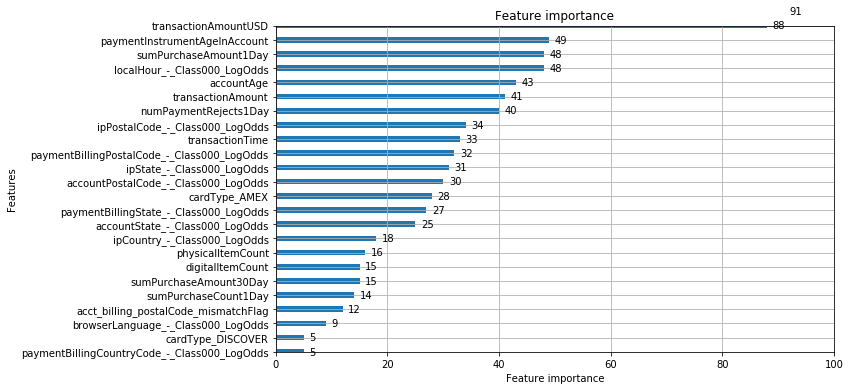

In [150]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [151]:
gbm.best_iteration_, gbm.best_score_

(27,
 defaultdict(dict,
             {'valid_0': {'auc': 0.8098273725366304,
               'binary_logloss': 0.033544506003766315}}))

In [152]:
lgb_pred_best = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
lgb_pred_proba_best = gbm.predict_proba(X_test, num_iteration=gbm.best_iteration_)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [153]:
lgb_bestfn, lgb_bestfp, lgb_bestfpr, lgb_besttpr, lgb_bestppv, lgb_bestf1, lgb_bestauc = metrics_calc(y_test, lgb_pred_best, lgb_pred_proba_best)

print('False Positive (incorrectly predicted as fraud) =     ',lgb_bestfp)
print('False Negative (incorrectly predicted as normal) =     ',lgb_bestfn)
print('Precision =     {:.3f}'.format(lgb_bestppv))
print('Recall (TPR) =  {:.3f}'.format(lgb_besttpr))
print('Fallout (FPR) = {:.3e}'.format(lgb_bestfpr))
print('F1 = {:.3e}'.format(lgb_bestf1))
print('AUC = {:.3e}'.format(lgb_bestauc))

False Positive (incorrectly predicted as fraud) =      10
False Negative (incorrectly predicted as normal) =      365
Precision =     0.750
Recall (TPR) =  0.076
Fallout (FPR) = 1.543e-04
F1 = 1.379e-01
AUC = 1.946e-01


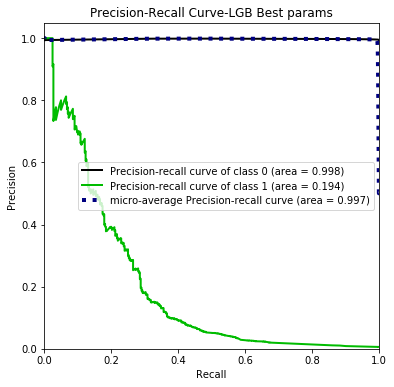

In [154]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, lgb_pred_proba_best, title='Precision-Recall Curve-LGB Best params', figsize=(6,6))
print()

### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93803 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 7 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 42 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 135 were correctly predicted as FRAUD. 

### This performed worse than default LGBM

### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93804 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 6 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 41 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 136 were correctly predicted as FRAUD. 

### Default LGBM Observation

- True Positive(TP) : Out of 93810 normal txns, 93808 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 2 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 36 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 141 were correctly predicted as FRAUD. 

## 6.2) Training and testing with only important features

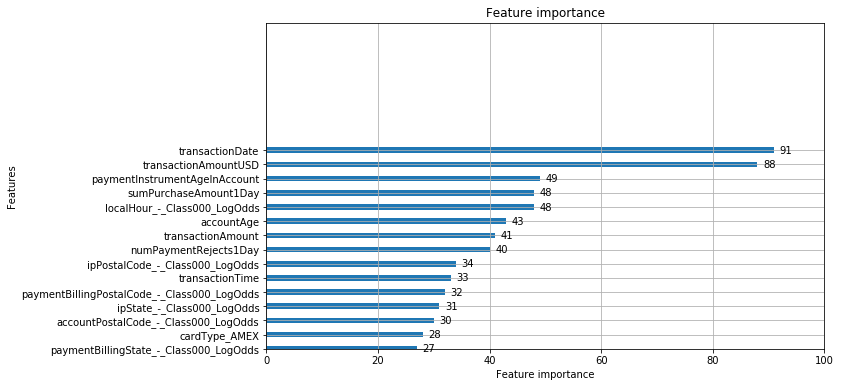

In [156]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 15, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [157]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(132424, 66) (132424,) (65224, 66) (65224,)


In [158]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(774, 131650, 0.005844861958557361, 0.9941551380414426)

In [159]:
len(y_test[y_test == 1]), len(y_test[y_test == 0]), len(y_test[y_test == 1])/len(y_test), len(y_test[y_test == 0])/len(y_test)

(395, 64829, 0.006056052986630688, 0.9939439470133693)

In [160]:
dtrain = lgb.Dataset(X_train, free_raw_data=False, silent=True)
dtrain.data.head()

,transactionCurrencyCode - Class000_LogOdds,localHour - Class000_LogOdds,ipState - Class000_LogOdds,ipPostalCode - Class000_LogOdds,ipCountry - Class000_LogOdds,browserLanguage - Class000_LogOdds,paymentBillingPostalCode - Class000_LogOdds,paymentBillingState - Class000_LogOdds,paymentBillingCountryCode - Class000_LogOdds,shippingPostalCode - Class000_LogOdds,...,cardType_MC,cardType_VISA,cvvVerifyResult_0,cvvVerifyResult_M,cvvVerifyResult_N,cvvVerifyResult_P,cvvVerifyResult_S,cvvVerifyResult_U,cvvVerifyResult_X,cvvVerifyResult_Y
57011,5.166279,4.895263,4.871762,0.780159,5.132626,5.166234,5.412885,5.563677,5.141895,5.127748,...,0,0,1,0,0,0,0,0,0,0
35250,4.842060,4.836982,3.379757,3.379757,3.387979,4.850044,5.412885,5.563677,4.094835,5.127748,...,0,1,0,1,0,0,0,0,0,0
41492,4.033379,4.921349,3.529398,4.665089,4.050173,3.938570,5.064533,3.331154,4.068874,5.127748,...,1,0,0,1,0,0,0,0,0,0
196314,5.145185,4.886641,2.628801,2.625359,3.836174,3.032022,5.064533,0.481838,3.410873,5.127748,...,1,0,0,1,0,0,0,0,0,0
179455,5.166279,4.886641,4.871556,1.939084,5.132626,5.166234,5.064533,4.911508,5.141895,5.127748,...,1,0,0,1,0,0,0,0,0,0


In [161]:
lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': None,
        'bagging_freq': 1,
        'n_jobs': 4
    }
# Fit the model
lgbrf_clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200)

lgbrf_pred = lgbrf_clf.predict(X_test)

In [162]:
# Get feature importances
feat_impt = pd.DataFrame()
feat_impt["feature"] = X_train.columns.tolist()
feat_impt["importance_gain"] = lgbrf_clf.feature_importance(importance_type='gain')
feat_impt["importance_split"] = lgbrf_clf.feature_importance(importance_type='split')
feat_impt['roc_auc_score'] = roc_auc_score(y_test, lgbrf_pred)
feat_impt['prec_score'] = average_precision_score(y_test, lgbrf_pred)

feat_impt

,feature,importance_gain,importance_split,roc_auc_score,prec_score
0,transactionCurrencyCode - Class000_LogOdds,0.0,0,0.5,0.006056
1,localHour - Class000_LogOdds,0.0,0,0.5,0.006056
2,ipState - Class000_LogOdds,0.0,0,0.5,0.006056
3,ipPostalCode - Class000_LogOdds,0.0,0,0.5,0.006056
4,ipCountry - Class000_LogOdds,0.0,0,0.5,0.006056
5,browserLanguage - Class000_LogOdds,0.0,0,0.5,0.006056
6,paymentBillingPostalCode - Class000_LogOdds,0.0,0,0.5,0.006056
7,paymentBillingState - Class000_LogOdds,0.0,0,0.5,0.006056
8,paymentBillingCountryCode - Class000_LogOdds,0.0,0,0.5,0.006056
9,shippingPostalCode - Class000_LogOdds,0.0,0,0.5,0.006056


In [163]:
# Fit LightGBM in RF mode
lgb_params = {
        'learning_rate': 0.15,
        'metric': 'l1', 
        'n_estimators': 100,
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': None,
        'bagging_freq': 1,
        'n_jobs': 4
    }
lgbm = lgb.LGBMClassifier(**lgb_params)

# Fit the model
lgbrf_clf = lgbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
        early_stopping_rounds=50, 
        verbose=100)  

lgbrf_pred = lgbrf_clf.predict(X_test)
lgbrf_pred_proba = lgbrf_clf.predict_proba(X_test)


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[34]	valid_0's auc: 0.803898	valid_0's binary_logloss: 0.140998


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [164]:
lgbrf_fn, lgbrf_fp, lgbrf_fpr, lgbrf_tpr, lgbrf_ppv, lgbrf_f1, lgbrf_auc = metrics_calc(y_test, lgbrf_pred, lgbrf_pred_proba)

print('False Positive (incorrectly predicted as fraud) =     ',lgbrf_fp)
print('False Negative (incorrectly predicted as normal) =     ',lgbrf_fn)
print('Precision =     {:.3f}'.format(lgbrf_ppv))
print('Recall (TPR) =  {:.3f}'.format(lgbrf_tpr))
print('Fallout (FPR) = {:.3e}'.format(lgbrf_fpr))
print('F1 = {:.3e}'.format(lgbrf_f1))
print('AUC = {:.3e}'.format(lgbrf_auc))

False Positive (incorrectly predicted as fraud) =      6
False Negative (incorrectly predicted as normal) =      389
Precision =     0.500
Recall (TPR) =  0.015
Fallout (FPR) = 9.255e-05
F1 = 2.948e-02
AUC = 1.084e-01


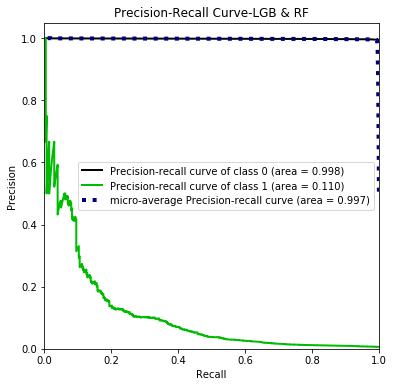

In [165]:
skplt.metrics.plot_precision_recall(y_test, lgbrf_pred_proba, title='Precision-Recall Curve-LGB & RF', figsize=(6,6))

In [166]:
pd.crosstab(y_test, lgbrf_pred, colnames=['Predicted'], margins=True)

Predicted,0,1,All
Label,,,
0,64823,6,64829
1,389,6,395
All,65212,12,65224


### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93797 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 13 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 45 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 132 were correctly predicted as FRAUD. 

### Not much improvement with RF & LGBM


# AdaBoost

In [168]:
rfcmodel = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, min_samples_leaf=5, max_features=0.5, 
                                 random_state=42)
adamodel = AdaBoostClassifier(base_estimator=rfcmodel, random_state=42, n_estimators=100)
adamodel.fit(X_train, y_train)
adamodel.score(X_test,y_test)

0.994403900404759

In [169]:
ada_pred = adamodel.predict(X_test)
ada_pred_proba = adamodel.predict_proba(X_test)

In [170]:
ada_fn, ada_fp, ada_fpr, ada_tpr, ada_ppv, ada_f1, ada_auc = metrics_calc(y_test, ada_pred, ada_pred_proba)

print('False Positive (incorrectly predicted as fraud) =     ',ada_fp)
print('False Negative (incorrectly predicted as normal) =     ',ada_fn)
print('Precision =     {:.3f}'.format(ada_ppv))
print('Recall (TPR) =  {:.3f}'.format(ada_tpr))
print('Fallout (FPR) = {:.3e}'.format(ada_fpr))
print('F1 = {:.3e}'.format(ada_f1))
print('AUC = {:.3e}'.format(ada_auc))

False Positive (incorrectly predicted as fraud) =      7
False Negative (incorrectly predicted as normal) =      358
Precision =     0.841
Recall (TPR) =  0.094
Fallout (FPR) = 1.080e-04
F1 = 1.686e-01
AUC = 2.023e-01


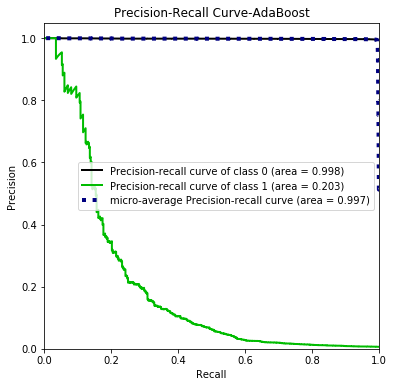

In [171]:
skplt.metrics.plot_precision_recall(y_test, ada_pred_proba, title='Precision-Recall Curve-AdaBoost', figsize=(6,6))

# Isolation Forest

In [172]:
## IsolationForest
from sklearn.ensemble import IsolationForest

In [175]:
credit.head()

,Label,transactionCurrencyCode - Class000_LogOdds,localHour - Class000_LogOdds,ipState - Class000_LogOdds,ipPostalCode - Class000_LogOdds,ipCountry - Class000_LogOdds,browserLanguage - Class000_LogOdds,paymentBillingPostalCode - Class000_LogOdds,paymentBillingState - Class000_LogOdds,paymentBillingCountryCode - Class000_LogOdds,...,cardType_MC,cardType_VISA,cvvVerifyResult_0,cvvVerifyResult_M,cvvVerifyResult_N,cvvVerifyResult_P,cvvVerifyResult_S,cvvVerifyResult_U,cvvVerifyResult_X,cvvVerifyResult_Y
0,0,4.833330,4.745402,1.218157,1.259543,4.899422,4.829913,5.064533,1.312186,4.876319,...,0,1,0,0,0,0,0,0,1,0
1,0,5.166279,4.921349,4.035601,3.981118,5.132626,5.166234,0.538996,4.401370,5.141895,...,1,0,0,1,0,0,0,0,0,0
2,0,5.166279,4.742303,3.314186,5.008490,5.132626,5.166234,5.064533,3.056357,5.141895,...,1,0,0,1,0,0,0,0,0,0
3,0,4.033379,4.745402,3.529398,1.324925,4.050173,3.938570,5.064533,3.331154,4.068874,...,0,1,0,1,0,0,0,0,0,0
4,0,5.166279,4.876771,3.529398,2.693451,4.050173,5.166234,5.412885,5.563677,4.068874,...,0,0,1,0,0,0,0,0,0,0


In [176]:
amtusd_mean = credit.transactionAmountUSD.mean(axis=0)
amtusd_std = credit.transactionAmountUSD.std(axis=0)
amt_mean = credit.transactionAmount.mean(axis=0)
amt_std = credit.transactionAmount.std(axis=0)

In [177]:
amtusd_norm  = credit.transactionAmountUSD - amtusd_mean
amtusd_norm =  amtusd_norm/amtusd_std

In [178]:
amt_norm  = credit.transactionAmount - amt_mean
amt_norm =  amt_norm/amt_std

In [179]:
credit['transactionAmountUSD'] = amtusd_norm
credit['transactionAmount'] = amt_norm
credit.head()

,Label,transactionCurrencyCode - Class000_LogOdds,localHour - Class000_LogOdds,ipState - Class000_LogOdds,ipPostalCode - Class000_LogOdds,ipCountry - Class000_LogOdds,browserLanguage - Class000_LogOdds,paymentBillingPostalCode - Class000_LogOdds,paymentBillingState - Class000_LogOdds,paymentBillingCountryCode - Class000_LogOdds,...,cardType_MC,cardType_VISA,cvvVerifyResult_0,cvvVerifyResult_M,cvvVerifyResult_N,cvvVerifyResult_P,cvvVerifyResult_S,cvvVerifyResult_U,cvvVerifyResult_X,cvvVerifyResult_Y
0,0,4.833330,4.745402,1.218157,1.259543,4.899422,4.829913,5.064533,1.312186,4.876319,...,0,1,0,0,0,0,0,0,1,0
1,0,5.166279,4.921349,4.035601,3.981118,5.132626,5.166234,0.538996,4.401370,5.141895,...,1,0,0,1,0,0,0,0,0,0
2,0,5.166279,4.742303,3.314186,5.008490,5.132626,5.166234,5.064533,3.056357,5.141895,...,1,0,0,1,0,0,0,0,0,0
3,0,4.033379,4.745402,3.529398,1.324925,4.050173,3.938570,5.064533,3.331154,4.068874,...,0,1,0,1,0,0,0,0,0,0
4,0,5.166279,4.876771,3.529398,2.693451,4.050173,5.166234,5.412885,5.563677,4.068874,...,0,0,1,0,0,0,0,0,0,0


In [180]:
X = credit.drop('Label', axis=1)
y = credit.Label

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(132424, 66) (132424,) (65224, 66) (65224,)


In [182]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(774, 131650, 0.005844861958557361, 0.9941551380414426)

In [183]:
X_train_if = X_train[y_train==0]

In [184]:
if_clf = IsolationForest(n_estimators=100, max_samples=.30, contamination=0.15, random_state=11, n_jobs=-1)

In [185]:
if_clf.fit(X_train_if)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


IsolationForest(bootstrap=False, contamination=0.15, max_features=1.0,
        max_samples=0.3, n_estimators=100, n_jobs=-1, random_state=11,
        verbose=0)

In [186]:
if_scores = if_clf.decision_function(X_test)

In [187]:
# Prediction
testpred_if = if_clf.predict(X_test)

In [188]:
if_scores

array([0.16751716, 0.14230061, 0.11982391, ..., 0.14851631, 0.11586965,
       0.14260378])

In [189]:
(testpred_if == -1).sum(), (testpred_if == 1).sum()

(9871, 55353)

In [190]:
testpred = list(map(lambda x: 1*(x == -1), testpred_if))

In [191]:
IF_predictions = pd.DataFrame({
    "predicted_class": list(map(lambda x: 1*(x == -1), testpred_if)),
    "orig_class": y_test,
    "predict": if_scores
})
IF_predictions.head()

,predicted_class,orig_class,predict
14520,0,0,0.167517
6882,0,0,0.142301
59791,0,0,0.119824
110001,0,0,0.156667
72128,0,0,0.159103


In [192]:
IF_predictions.predicted_class.value_counts()

0    55353
1     9871
Name: predicted_class, dtype: int64

In [193]:
IF_predictions.orig_class.value_counts()

0    64829
1      395
Name: orig_class, dtype: int64